## DEVELOP A MACHINE LEARNING MODEL TO PREDICT WHETHER NON-BANKING FINANCIAL INSTITUTION (NBFI) CLIENTS  IS LIKELY TO DEFAULT ON THEIR VEHICLE LOAN PAYMENT OR NOT

####  A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a type of financial institution that is not authorized to operate as a bank or is not under the supervision of a banking regulatory agency at the national or international level. NBFCs provide financial services similar to those of banks, such as investment, risk pooling, contractual savings, and market brokering.

#### An NBFC is currently facing profitability issues due to an increase in defaults in the vehicle loan category. The company aims to assess the loan repayment ability of clients and determine the relative importance of each factor contributing to a borrower's ability to repay the loan.

######   <img src="LOAN_IMAGE.jpg" width="500" height="340">      <img src="LOAN_IMAGE2.png" width="500" height="340"> 

# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
df = pd.read_csv("Train_Dataset.csv")              # IMPORT TRAIN DATA
pd.set_option("display.max_columns", None)

In [3]:
df.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0      61190.55      3416.85            Alone         Commercial   
1          0.0         15282      1826.55            Alone            Service   
2          1.0      59527.35       2788.2            Alone            Service   
3          0.0       53870.4      2295.45            Alone            Retired   
4          2.0      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.028663    13957          1062   
1                Home                   0.008575    14162          4129   
2              Family                     0.0228    16790          5102   
3                Home                   0.010556    23195        365243   
4                Home                   0.020713    11366          2977   

  Registration_Days ID_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  \
0              6123     383            NaN           1              1   
1              7833      21            0.0           1              0   
2               NaN     331            NaN           1              0   
3               NaN     775            NaN           1              0   
4              5516    4043            6.0           1              0   

   Workphone_Working Client_Occupation  Client_Family_Members  \
0                  0             Sales                    2.0   
1                  1               NaN                    2.0   
2                  0     Realty agents                    2.0   
3                  0               NaN                    2.0   
4                  0          Laborers                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                       NaN   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                       NaN   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_1  Score_Source_2 Score_Source_3  Social_Circle_Default  \
0        0.568066        0.478787            NaN                 0.0186   
1        0.563360        0.215068            NaN                    NaN   
2             NaN        0.552795       0.329655                 0.0742   
3             NaN        0.135182       0.631355                 

In [4]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [5]:
df.shape

(121856, 40)

In [6]:
df1 = pd.read_csv("Test_Dataset.csv")        # IMPORT TEST DATA
df1.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12202227         11250        0.0         1.0          1.0        1.0   
1  12279381         13500        1.0         1.0          1.0        1.0   
2  12222714         38250        0.0         1.0          0.0        1.0   
3  12265215         20250        0.0         0.0          1.0        0.0   
4  12203970         13500        1.0         1.0          0.0        1.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0        112500       4474.8         Relative            Service   
1          3.0         49752      3252.15            Alone            Service   
2          0.0         67500         3375            Alone         Commercial   
3          0.0      50849.55      3814.65            Alone           Govt Job   
4          0.0       43603.2      2515.95            Alone            Service   

  Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0              NaN                     M          Male                 CL   
1        Secondary                     M        Female                 CL   
2       Graduation                     M        Female                 RL   
3        Secondary                     S          Male                 CL   
4        Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.019101    20063          2523   
1                Home                     0.0105    13200           551   
2                Home                   0.032561    15943          1319   
3                 NaN                    0.01452    15634          1510   
4                Home                   0.008625    15811          1075   

  Registration_Days ID_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  \
0              2318    3318            NaN           1              0   
1              6972    3865            6.0           1              1   
2               981    2296            NaN           1              0   
3              4975    6121            NaN           1              1   
4              5478    3618            7.0           1              0   

   Workphone_Working Client_Occupation  Client_Family_Members  \
0                  0               NaN                    NaN   
1                  0          Laborers                    5.0   
2                  1          Managers                    2.0   
3                  1               NaN                    1.0   
4                  0          Managers                    2.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      4.0                      16.0   
1                 3.0                      3.0                      18.0   
2                 1.0                      2.0                      19.0   
3                 2.0                      6.0                      20.0   
4                 2.0                      1.0                      13.0   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                         No                     Yes           Self-employed   
2                        Yes                     Yes  Business Entity Type 3   
3                         No                      No                Medicine   
4                        Yes                     Yes           Self-employed   

   Score_Source_1 Score_Source_2 Score_Source_3  Social_Circle_Default  \
0             NaN       0.757151       0.629674                 0.0515   
1             NaN       0.342269            NaN                    NaN   
2             NaN       0.683665            NaN                 0.1503   
3        0.351581        0.22995       0.672243                    NaN   
4        0.73

In [7]:
df1.shape

(80900, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

 ###### ----------------CONCATINATING TRAIN DATA AND TEST DATA FOR PRE-PROCESSING --------------

In [9]:
df["data"] = "train"
df1["data"]  = "test"

In [10]:
data = pd.concat([df,df1],axis=0)
data.tail()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
80895  12210181         11700        0.0         0.0          0.0        1.0   
80896  12206257         29250        0.0         1.0          1.0        1.0   
80897  12200446         54000        1.0         0.0          1.0        1.0   
80898  12244943         13500        0.0         0.0          1.0        0.0   
80899  12229890         10350        1.0         0.0          0.0        0.0   

       Child_Count Credit_Amount Loan_Annuity Accompany_Client  \
80895          2.0        107820      3152.25            Alone   
80896          2.0     116430.75       4630.5            Alone   
80897          0.0         52128       2742.3            Alone   
80898          0.0         25470      1435.05            Alone   
80899          1.0         26955       1475.1            Alone   

      Client_Income_Type Client_Education Client_Marital_Status Client_Gender  \
80895                NaN        Secondary                     M          Male   
80896           Govt Job       Graduation                     M          Male   
80897            Service        Secondary                     M        Female   
80898            Service       Graduation                     M        Female   
80899                NaN       Graduation                     M        Female   

      Loan_Contract_Type Client_Housing_Type Population_Region_Relative  \
80895                 CL                Home                    0.00963   
80896                NaN                Home                    0.04622   
80897                 CL                Home                   0.030755   
80898                 CL                 NaN                   0.014464   
80899                 CL                Home                   0.018209   

      Age_Days Employed_Days Registration_Days ID_Days  Own_House_Age  \
80895    13867          1165              5970    3276            NaN   
80896    14020          1699               NaN    5219            NaN   
80897     9954           796              4394     722           19.0   
80898    21464          2335              7722    2637            NaN   
80899    10180          1255              4266    2157           14.0   

       Mobile_Tag  Homephone_Tag  Workphone_Working Client_Occupation  \
80895           1              1                  1              Core   
80896           1              0                  1              Core   
80897           1              0                  0          Laborers   
80898           1              0                  0          Laborers   
80899           1              0                  1          Laborers   

       Client_Family_Members  Cleint_City_Rating  Application_Process_Day  \
80895                    4.0                 2.0                      2.0   
80896                    4.0                 1.0                      6.0   
80897                    2.0                 2.0                      3.0   
80898                    2.0                 2.0                      6.0   
80899                    3.0                 3.0                      4.0   

       Application_Process_Hour Client_Permanent_Match_Tag  \
80895                       9.0                        Yes   
80896                      15.0                        Yes   
80897                      14.0                        Yes   
80898                       5.0                        Yes   
80899                       9.0                        Yes   

      Client_Contact_Work_Tag       Type_Organization  Score_Source_1  \
80895                      No           Self-employed        0.495015   
80896                     Yes            Kindergarten        0.803057   
80897                      No           Self-employed             NaN   
80898                     Yes        Industry: type 9             NaN   
80899                     Yes  Business Entity Type 2        0.127368   

      Score_Source_2 Score_Source_3  Social_

In [11]:
data.isnull().sum()

ID                                 0
Client_Income                   6041
Car_Owned                       5986
Bike_Owned                      6110
Active_Loan                     6089
House_Own                       6008
Child_Count                     5966
Credit_Amount                   5919
Loan_Annuity                    8015
Accompany_Client                2954
Client_Income_Type              6202
Client_Education                5995
Client_Marital_Status           5916
Client_Gender                   4040
Loan_Contract_Type              5972
Client_Housing_Type             6095
Population_Region_Relative      8127
Age_Days                        6079
Employed_Days                   6070
Registration_Days               6012
ID_Days                         9849
Own_House_Age                 133676
Mobile_Tag                         0
Homephone_Tag                      0
Workphone_Working                  0
Client_Occupation              69280
Client_Family_Members           4054
C

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               196715 non-null  object 
 2   Car_Owned                   196770 non-null  float64
 3   Bike_Owned                  196646 non-null  float64
 4   Active_Loan                 196667 non-null  float64
 5   House_Own                   196748 non-null  float64
 6   Child_Count                 196790 non-null  float64
 7   Credit_Amount               196837 non-null  object 
 8   Loan_Annuity                194741 non-null  object 
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender  

In [13]:
data.isnull().sum() / len(data) * 100

ID                             0.000000
Client_Income                  2.979443
Car_Owned                      2.952317
Bike_Owned                     3.013474
Active_Loan                    3.003117
House_Own                      2.963168
Child_Count                    2.942453
Credit_Amount                  2.919272
Loan_Annuity                   3.953027
Accompany_Client               1.456924
Client_Income_Type             3.058849
Client_Education               2.956756
Client_Marital_Status          2.917793
Client_Gender                  1.992543
Loan_Contract_Type             2.945412
Client_Housing_Type            3.006076
Population_Region_Relative     4.008266
Age_Days                       2.998185
Employed_Days                  2.993746
Registration_Days              2.965140
ID_Days                        4.857563
Own_House_Age                 65.929492
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


###### ---------------MISSING VALUE MORE THAN 50 % - DROPPING THAT VARIABLES---------------

In [14]:
data = data.drop(["Own_House_Age" , "Score_Source_1" , "Social_Circle_Default"], axis=1)

In [15]:
data.shape

(202756, 38)

###### ----------------- REPLACING UNNECCESARY WORDS WITH np.nan -------------

In [18]:
word = ["$" ,"NA", "NA", "#VALUE!", "##" , "XNA" , "@" , "x" , "#NA" , "&"  , "#" , "Unknown"]

for i in data.columns:
    for j in word:
        data[i] = data[i].replace(j , np.nan)

###### --------------- SPLITTING TRAIN AND TEST DATASET AGAIN FOR MISSING VALUE TREATMENT ---------------

In [19]:
train = data[data["data"] == "train" ] 
train.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0      61190.55      3416.85            Alone         Commercial   
1          0.0         15282      1826.55            Alone            Service   
2          1.0      59527.35       2788.2            Alone            Service   
3          0.0       53870.4      2295.45            Alone            Retired   
4          2.0      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.028663    13957          1062   
1                Home                   0.008575    14162          4129   
2              Family                     0.0228    16790          5102   
3                Home                   0.010556    23195        365243   
4                Home                   0.020713    11366          2977   

  Registration_Days ID_Days  Mobile_Tag  Homephone_Tag  Workphone_Working  \
0              6123     383           1              1                  0   
1              7833      21           1              0                  1   
2               NaN     331           1              0                  0   
3               NaN     775           1              0                  0   
4              5516    4043           1              0                  0   

  Client_Occupation  Client_Family_Members  Cleint_City_Rating  \
0             Sales                    2.0                 2.0   
1               NaN                    2.0                 2.0   
2     Realty agents                    2.0                 2.0   
3               NaN                    2.0                 3.0   
4          Laborers                    4.0                 1.0   

   Application_Process_Day  Application_Process_Hour  \
0                      6.0                      17.0   
1                      3.0                      10.0   
2                      4.0                       NaN   
3                      2.0                      15.0   
4                      3.0                       NaN   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     NaN   
4                        Yes                     Yes  Business Entity Type 3   

  Score_Source_2 Score_Source_3  Phone_Change  Credit_Bureau  Default   data  
0       0.478787            NaN          63.0            NaN      0.0  train  
1       0.215068            NaN           NaN            NaN      0.0  train  
2       0.552795       0.329655         277.0            0.0      0.0  train  
3       0.135182       0.631355        1700.0            3.0      0.0  train  
4       0.301182       0.355639         674.0            1.0

In [20]:
test = data[data["data"]=="test"]
test.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12202227         11250        0.0         1.0          1.0        1.0   
1  12279381         13500        1.0         1.0          1.0        1.0   
2  12222714         38250        0.0         1.0          0.0        1.0   
3  12265215         20250        0.0         0.0          1.0        0.0   
4  12203970         13500        1.0         1.0          0.0        1.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0          0.0        112500       4474.8         Relative            Service   
1          3.0         49752      3252.15            Alone            Service   
2          0.0         67500         3375            Alone         Commercial   
3          0.0      50849.55      3814.65            Alone           Govt Job   
4          0.0       43603.2      2515.95            Alone            Service   

  Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0              NaN                     M          Male                 CL   
1        Secondary                     M        Female                 CL   
2       Graduation                     M        Female                 RL   
3        Secondary                     S          Male                 CL   
4        Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.019101    20063          2523   
1                Home                     0.0105    13200           551   
2                Home                   0.032561    15943          1319   
3                 NaN                    0.01452    15634          1510   
4                Home                   0.008625    15811          1075   

  Registration_Days ID_Days  Mobile_Tag  Homephone_Tag  Workphone_Working  \
0              2318    3318           1              0                  0   
1              6972    3865           1              1                  0   
2               981    2296           1              0                  1   
3              4975    6121           1              1                  1   
4              5478    3618           1              0                  0   

  Client_Occupation  Client_Family_Members  Cleint_City_Rating  \
0               NaN                    NaN                 2.0   
1          Laborers                    5.0                 3.0   
2          Managers                    2.0                 1.0   
3               NaN                    1.0                 2.0   
4          Managers                    2.0                 2.0   

   Application_Process_Day  Application_Process_Hour  \
0                      4.0                      16.0   
1                      3.0                      18.0   
2                      2.0                      19.0   
3                      6.0                      20.0   
4                      1.0                      13.0   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                         No                     Yes           Self-employed   
2                        Yes                     Yes  Business Entity Type 3   
3                         No                      No                Medicine   
4                        Yes                     Yes           Self-employed   

  Score_Source_2 Score_Source_3  Phone_Change  Credit_Bureau  Default  data  
0       0.757151       0.629674         716.0            2.0      NaN  test  
1       0.342269            NaN         181.0            NaN      NaN  test  
2       0.683665            NaN         281.0            NaN      NaN  test  
3        0.22995       0.672243        1442.0            4.0      NaN  test  
4       0.566971       0.730987         927.0            1.0      NaN  test

# DATA PREPROCESSING
## 1. MISSING VALUE TREATMENT --- TRAIN DATASET

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  object 
 8   Loan_Annuity                117030 non-null  object 
 9   Accompany_Client            120098 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

##### -------------- Converting to Numeric (wrongly entered as object) -------------------

In [22]:
train["Client_Income"] = pd.to_numeric(train["Client_Income"])
train["Credit_Amount"] = pd.to_numeric(train["Credit_Amount"])
train["Loan_Annuity"] = pd.to_numeric(train["Loan_Annuity"])
train["Population_Region_Relative"] = pd.to_numeric(train["Population_Region_Relative"])
train["Age_Days"] = pd.to_numeric(train["Age_Days"])
train["Employed_Days"] = pd.to_numeric(train["Employed_Days"])
train["Registration_Days"] = pd.to_numeric(train["Registration_Days"])
train["ID_Days"] = pd.to_numeric(train["ID_Days"])
train["Score_Source_2"] = pd.to_numeric(train["Score_Source_2"])
train["Score_Source_3"] = pd.to_numeric(train["Score_Source_3"])

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120098 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

###### -----------IMPUTING MISSING VALUES (NUMERICAL - MEDIAN) ----------------

In [24]:
for i in train.select_dtypes(exclude=['object']).columns:
    train[i] = train[i].fillna(train[i].median())

In [25]:
train.isnull().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client               1758
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2416
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members             0
Cleint_City_Rating                0
Application_Process_Day     

###### -------------IMPUTING MISSING VALUES ( CATEGORICAL - MODE ) ----------------

In [26]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(strategy="most_frequent" , missing_values=np.nan)
train_imputed = imp_mode.fit_transform(train)
train_imputed = pd.DataFrame(train_imputed)
train_imputed.columns = train.columns

In [27]:
train_imputed.head()

ID Client_Income Car_Owned Bike_Owned Active_Loan House_Own  \
0  12142509        6750.0       0.0        0.0         1.0       0.0   
1  12138936       20250.0       1.0        0.0         1.0       1.0   
2  12181264       18000.0       0.0        0.0         1.0       0.0   
3  12188929       15750.0       0.0        0.0         1.0       1.0   
4  12133385       33750.0       1.0        0.0         1.0       0.0   

  Child_Count Credit_Amount Loan_Annuity Accompany_Client Client_Income_Type  \
0         0.0      61190.55      3416.85            Alone         Commercial   
1         0.0       15282.0      1826.55            Alone            Service   
2         1.0      59527.35       2788.2            Alone            Service   
3         0.0       53870.4      2295.45            Alone            Retired   
4         2.0      133988.4      3547.35            Alone         Commercial   

     Client_Education Client_Marital_Status Client_Gender Loan_Contract_Type  \
0           Secondary                     M          Male                 CL   
1          Graduation                     M          Male                 CL   
2  Graduation dropout                     W          Male                 CL   
3           Secondary                     M          Male                 CL   
4           Secondary                     M        Female                 CL   

  Client_Housing_Type Population_Region_Relative Age_Days Employed_Days  \
0                Home                   0.028663  13957.0        1062.0   
1                Home                   0.008575  14162.0        4129.0   
2              Family                     0.0228  16790.0        5102.0   
3                Home                   0.010556  23195.0      365243.0   
4                Home                   0.020713  11366.0        2977.0   

  Registration_Days ID_Days Mobile_Tag Homephone_Tag Workphone_Working  \
0            6123.0   383.0          1             1                 0   
1            7833.0    21.0          1             0                 1   
2            4493.0   331.0          1             0                 0   
3            4493.0   775.0          1             0                 0   
4            5516.0  4043.0          1             0                 0   

  Client_Occupation Client_Family_Members Cleint_City_Rating  \
0             Sales                   2.0                2.0   
1          Laborers                   2.0                2.0   
2     Realty agents                   2.0                2.0   
3          Laborers                   2.0                3.0   
4          Laborers                   4.0                1.0   

  Application_Process_Day Application_Process_Hour Client_Permanent_Match_Tag  \
0                     6.0                     17.0                        Yes   
1                     3.0                     10.0                        Yes   
2                     4.0                     12.0                        Yes   
3                     2.0                     15.0                        Yes   
4                     3.0                     12.0                        Yes   

  Client_Contact_Work_Tag       Type_Organization Score_Source_2  \
0                     Yes           Self-employed       0.478787   
1                     Yes              Government       0.215068   
2                     Yes           Self-employed       0.552795   
3                     Yes  Business Entity Type 3       0.135182   
4                     Yes  Business Entity Type 3       0.301182   

  Score_Source_3 Phone_Change Credit_Bureau Default   data  
0        0.53707         63.0           1.0     0.0  train  
1        0.53707        755.0           1.0     0.0  train  
2       0.329655        277.0           0.0     0.0  train  
3       0.631355       1700.0           3.0     0.0  train  
4       0.355639        674.0           1.0     0.0  train

In [28]:
train_imputed.isnull().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Org

###### ----------------CROSS CHECKING WITH UNIQUE VALUES -------------

In [29]:
for i in train_imputed.columns:
    print("******************",i,"*******************")
    print()
    print(set(train_imputed[i].to_list()))
    print()

****************** ID *******************

{12100001, 12100002, 12100003, 12100004, 12100005, 12100006, 12100007, 12100008, 12100009, 12100010, 12100011, 12100012, 12100013, 12100014, 12100015, 12100016, 12100017, 12100018, 12100019, 12100020, 12100021, 12100022, 12100023, 12100024, 12100025, 12100026, 12100027, 12100028, 12100029, 12100030, 12100031, 12100032, 12100033, 12100034, 12100035, 12100036, 12100037, 12100038, 12100039, 12100040, 12100041, 12100042, 12100043, 12100044, 12100045, 12100046, 12100047, 12100048, 12100049, 12100050, 12100051, 12100052, 12100053, 12100054, 12100055, 12100056, 12100057, 12100058, 12100059, 12100060, 12100061, 12100062, 12100063, 12100064, 12100065, 12100066, 12100067, 12100068, 12100069, 12100070, 12100071, 12100072, 12100073, 12100074, 12100075, 12100076, 12100077, 12100078, 12100079, 12100080, 12100081, 12100082, 12100083, 12100084, 12100085, 12100086, 12100087, 12100088, 12100089, 12100090, 12100091, 12100092, 12100093, 12100094, 12100095, 121000

{0.537069958, 0.631354537, 0.549596502, 0.75574005, 0.292588007, 0.64797686, 0.289611238, 0.75037515, 0.294083101, 0.558506628, 0.216402961, 0.463275328, 0.313916677, 0.135106016, 0.047274818, 0.81391747, 0.170446123, 0.053114173, 0.866731234, 0.74766339, 0.406617437, 0.877194258, 0.055711423, 0.763639921, 0.885488394, 0.184116156, 0.245851214, 0.043525807, 0.174564266, 0.143758053, 0.086731264, 0.84066656, 0.345784802, 0.031624774, 0.030968798, 0.029904674, 0.02242068, 0.067339509, 0.896009549, 0.872455816, 0.070580519, 0.781378238, 0.845437922, 0.042633843, 0.556727426, 0.588487788, 0.72239289, 0.148254379, 0.272133684, 0.16540746, 0.387625344, 0.109626434, 0.662637792, 0.310818254, 0.452533559, 0.342528872, 0.477649155, 0.020167989, 0.066439172, 0.746300213, 0.725276435, 0.123735322, 0.073965146, 0.114652494, 0.074959281, 0.858177559, 0.726711209, 0.811722793, 0.034385564, 0.686382335, 0.149167461, 0.664248263, 0.857297454, 0.86165275, 0.590233339, 0.511891802, 0.676992503, 0.584990

In [30]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   ID                          121856 non-null  object
 1   Client_Income               121856 non-null  object
 2   Car_Owned                   121856 non-null  object
 3   Bike_Owned                  121856 non-null  object
 4   Active_Loan                 121856 non-null  object
 5   House_Own                   121856 non-null  object
 6   Child_Count                 121856 non-null  object
 7   Credit_Amount               121856 non-null  object
 8   Loan_Annuity                121856 non-null  object
 9   Accompany_Client            121856 non-null  object
 10  Client_Income_Type          121856 non-null  object
 11  Client_Education            121856 non-null  object
 12  Client_Marital_Status       121856 non-null  object
 13  Client_Gender               1

###### -----------While Imputing with sklearn simple imputer, all data types are converted into object. So Converting them into Original Data types--------

In [31]:
for i in train.select_dtypes(exclude=["object"]).columns:
    train_imputed[i] = train_imputed[i].apply(lambda x : float(x))

In [32]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  float64
 1   Client_Income               121856 non-null  float64
 2   Car_Owned                   121856 non-null  float64
 3   Bike_Owned                  121856 non-null  float64
 4   Active_Loan                 121856 non-null  float64
 5   House_Own                   121856 non-null  float64
 6   Child_Count                 121856 non-null  float64
 7   Credit_Amount               121856 non-null  float64
 8   Loan_Annuity                121856 non-null  float64
 9   Accompany_Client            121856 non-null  object 
 10  Client_Income_Type          121856 non-null  object 
 11  Client_Education            121856 non-null  object 
 12  Client_Marital_Status       121856 non-null  object 
 13  Client_Gender 

## MISSING VALUE TREATMENT -- TEST DATASET

In [33]:
test = test.drop(["Default"] , axis=1)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80900 entries, 0 to 80899
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78449 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78609 non-null  object 
 8   Loan_Annuity                77692 non-null  object 
 9   Accompany_Client            79688 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78456 non-null  object 
 13  Client_Gender               792

###### -------------- Converting to Numeric (wrongly entered as object) -------------------

In [35]:
test["Client_Income"] = pd.to_numeric(test["Client_Income"])
test["Credit_Amount"] = pd.to_numeric(test["Credit_Amount"])
test["Loan_Annuity"] = pd.to_numeric(test["Loan_Annuity"])
test["Population_Region_Relative"] = pd.to_numeric(test["Population_Region_Relative"])
test["Age_Days"] = pd.to_numeric(test["Age_Days"])
test["Employed_Days"] = pd.to_numeric(test["Employed_Days"])
test["Registration_Days"] = pd.to_numeric(test["Registration_Days"])
test["ID_Days"] = pd.to_numeric(test["ID_Days"])
test["Score_Source_2"] = pd.to_numeric(test["Score_Source_2"])
test["Score_Source_3"] = pd.to_numeric(test["Score_Source_3"])

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80900 entries, 0 to 80899
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78449 non-null  float64
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78609 non-null  float64
 8   Loan_Annuity                77692 non-null  float64
 9   Accompany_Client            79688 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78456 non-null  object 
 13  Client_Gender               792

###### -----------IMPUTING MISSING VALUES (NUMERICAL - MEDIAN) ----------------

In [37]:
for i in test.select_dtypes(exclude=['object']).columns:
    test[i] = test[i].fillna(test[i].median())

In [38]:
test.isnull().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client               1212
Client_Income_Type             2501
Client_Education               2350
Client_Marital_Status          2444
Client_Gender                  1628
Loan_Contract_Type             2321
Client_Housing_Type            2408
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             27845
Client_Family_Members             0
Cleint_City_Rating                0
Application_Process_Day     

###### -------------IMPUTING MISSING VALUES ( CATEGORICAL - MODE ) ----------------

In [39]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(strategy="most_frequent" , missing_values=np.nan)
test_imputed = imp_mode.fit_transform(test)
test_imputed = pd.DataFrame(test_imputed)
test_imputed.columns = test.columns

In [40]:
test_imputed.isnull().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Org

###### -----------While Imputing with sklearn simple imputer, all data types are converted into object. So Converting them into Original Data types--------

In [41]:
for i in test.select_dtypes(exclude=["object"]).columns:
    test_imputed[i] = test_imputed[i].apply(lambda x : float(x))

In [42]:
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  float64
 1   Client_Income               80900 non-null  float64
 2   Car_Owned                   80900 non-null  float64
 3   Bike_Owned                  80900 non-null  float64
 4   Active_Loan                 80900 non-null  float64
 5   House_Own                   80900 non-null  float64
 6   Child_Count                 80900 non-null  float64
 7   Credit_Amount               80900 non-null  float64
 8   Loan_Annuity                80900 non-null  float64
 9   Accompany_Client            80900 non-null  object 
 10  Client_Income_Type          80900 non-null  object 
 11  Client_Education            80900 non-null  object 
 12  Client_Marital_Status       80900 non-null  object 
 13  Client_Gender               809

###### ------------ CROSS CHECK WITH  UNIQUE VALUES IN TEST DATASET  ---------

In [44]:
for i in test_imputed.select_dtypes(exclude=["float64"]).columns:
    print("******************",i,"*******************")
    print()
    print(set(test_imputed[i].to_list()))
    print()

****************** Accompany_Client *******************

{'Group', 'Alone', 'Relative', 'Partner', 'Others', 'Kids'}

****************** Client_Income_Type *******************

{'Commercial', 'Retired', 'Unemployed', 'Govt Job', 'Student', 'Service', 'Businessman'}

****************** Client_Education *******************

{'Post Grad', 'Graduation', 'Secondary', 'Graduation dropout', 'junior secondary'}

****************** Client_Marital_Status *******************

{'W', 'D', 'M', 'S'}

****************** Client_Gender *******************

{'Female', 'Male'}

****************** Loan_Contract_Type *******************

{'RL', 'CL'}

****************** Client_Housing_Type *******************

{'Rental', 'Office', 'Shared', 'Home', 'Municipal', 'Family'}

****************** Client_Occupation *******************

{'IT', 'Medicine', 'Secretaries', 'Sales', 'High skill tech', 'Accountants', 'Cleaning', 'Core', 'Drivers', 'Security', 'Managers', 'HR', 'Waiters/barmen', 'Low-skill Laborers', 'R

## 2. ENCODING PART

In [45]:
all_data = pd.concat([train_imputed , test_imputed] , axis=0)
all_data.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  \
0          0.0       61190.55       3416.85            Alone   
1          0.0       15282.00       1826.55            Alone   
2          1.0       59527.35       2788.20            Alone   
3          0.0       53870.40       2295.45            Alone   
4          2.0      133988.40       3547.35            Alone   

  Client_Income_Type    Client_Education Client_Marital_Status Client_Gender  \
0         Commercial           Secondary                     M          Male   
1            Service          Graduation                     M          Male   
2            Service  Graduation dropout                     W          Male   
3            Retired           Secondary                     M          Male   
4         Commercial           Secondary                     M        Female   

  Loan_Contract_Type Client_Housing_Type  Population_Region_Relative  \
0                 CL                Home                    0.028663   
1                 CL                Home                    0.008575   
2                 CL              Family                    0.022800   
3                 CL                Home                    0.010556   
4                 CL                Home                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working Client_Occupation  Client_Family_Members  \
0            1.0                0.0             Sales                    2.0   
1            0.0                1.0          Laborers                    2.0   
2            0.0                0.0     Realty agents                    2.0   
3            0.0                0.0          Laborers                    2.0   
4            0.0                0.0          Laborers                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes  Business Entity Type 3   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default   data  
0        0.478787        0.537070          63.0            1.0      0.0  train  
1        0.215068        0.537070         755.0            1.0      0.0  train  
2        0.552795        0.329655         277.0            0.0      0.0  train  
3        0.135182        0.631355        1700.0            3.0      0.0  

In [168]:
all_data.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  \
0          0.0       61190.55       3416.85            Alone   
1          0.0       15282.00       1826.55            Alone   
2          1.0       59527.35       2788.20            Alone   
3          0.0       53870.40       2295.45            Alone   
4          2.0      133988.40       3547.35            Alone   

  Client_Income_Type    Client_Education Client_Marital_Status Client_Gender  \
0         Commercial           Secondary                     M          Male   
1            Service          Graduation                     M          Male   
2            Service  Graduation dropout                     W          Male   
3            Retired           Secondary                     M          Male   
4         Commercial           Secondary                     M        Female   

  Loan_Contract_Type Client_Housing_Type  Population_Region_Relative  \
0                 CL                Home                    0.028663   
1                 CL                Home                    0.008575   
2                 CL              Family                    0.022800   
3                 CL                Home                    0.010556   
4                 CL                Home                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working Client_Occupation  Client_Family_Members  \
0            1.0                0.0             Sales                    2.0   
1            0.0                1.0          Laborers                    2.0   
2            0.0                0.0     Realty agents                    2.0   
3            0.0                0.0          Laborers                    2.0   
4            0.0                0.0          Laborers                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes  Business Entity Type 3   
4                        Yes                     Yes  Business Entity Type 3   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default   data  
0        0.478787        0.537070          63.0            1.0      0.0  train  
1        0.215068        0.537070         755.0            1.0      0.0  train  
2        0.552795        0.329655         277.0            0.0      0.0  train  
3        0.135182        0.631355        1700.0            3.0      0.0  

In [47]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  float64
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            202756 non-null  object 
 10  Client_Income_Type          202756 non-null  object 
 11  Client_Education            202756 non-null  object 
 12  Client_Marital_Status       202756 non-null  object 
 13  Client_Gender  

In [48]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [49]:
df1 = all_data.select_dtypes(exclude=["float64"]).apply(preprocessing.LabelEncoder().fit_transform)
df1.head()

Accompany_Client  Client_Income_Type  Client_Education  \
0                 0                   1                 4   
1                 0                   5                 0   
2                 0                   5                 1   
3                 0                   4                 4   
4                 0                   1                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
1                      1              1                   0   
2                      3              1                   0   
3                      1              1                   0   
4                      1              0                   0   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0                    1                 14                           1   
1                    1                  8                           1   
2                    0                 13                           1   
3                    1                  8                           1   
4                    1                  8                           1   

   Client_Contact_Work_Tag  Type_Organization  data  
0                        1                 42     1  
1                        1                 11     1  
2                        1                 42     1  
3                        1                  5     1  
4                        1                  5     1

In [50]:
df2 = all_data.select_dtypes(exclude=['object'])
df2.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0          0.0       61190.55       3416.85                    0.028663   
1          0.0       15282.00       1826.55                    0.008575   
2          1.0       59527.35       2788.20                    0.022800   
3          0.0       53870.40       2295.45                    0.010556   
4          2.0      133988.40       3547.35                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0            1.0                0.0                    2.0   
1            0.0                1.0                    2.0   
2            0.0                0.0                    2.0   
3            0.0                0.0                    2.0   
4            0.0                0.0                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default  
0        0.478787        0.537070          63.0            1.0      0.0  
1        0.215068        0.537070         755.0            1.0      0.0  
2        0.552795        0.329655         277.0            0.0      0.0  
3        0.135182        0.631355        1700.0            3.0      0.0  
4        0.301182        0.355639         674.0            1.0      0.0

In [51]:
all_data_enc = pd.concat([df2,df1]  , axis=1 )
all_data_enc.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0          0.0       61190.55       3416.85                    0.028663   
1          0.0       15282.00       1826.55                    0.008575   
2          1.0       59527.35       2788.20                    0.022800   
3          0.0       53870.40       2295.45                    0.010556   
4          2.0      133988.40       3547.35                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0            1.0                0.0                    2.0   
1            0.0                1.0                    2.0   
2            0.0                0.0                    2.0   
3            0.0                0.0                    2.0   
4            0.0                0.0                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default  \
0        0.478787        0.537070          63.0            1.0      0.0   
1        0.215068        0.537070         755.0            1.0      0.0   
2        0.552795        0.329655         277.0            0.0      0.0   
3        0.135182        0.631355        1700.0            3.0      0.0   
4        0.301182        0.355639         674.0            1.0      0.0   

   Accompany_Client  Client_Income_Type  Client_Education  \
0                 0                   1                 4   
1                 0                   5                 0   
2                 0                   5                 1   
3                 0                   4                 4   
4                 0                   1                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
1                      1              1                   0   
2                      3              1                   0   
3                      1              1                   0   
4                      1              0                   0   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0                    1                 14                           1   
1                    1                  8                           1   
2                    0                 13                           1   
3                    1                  8                           1   
4                    1                  8                           1   

   Client_Contact_Work_Tag  Type_Organization  data  
0                        1                 42     1  
1                        1                 11     1  
2                        1          

## 3. HANDLING OUTLIER

In [52]:
all_data_enc.describe()

ID  Client_Income      Car_Owned     Bike_Owned  \
count  2.027560e+05   2.027560e+05  202756.000000  202756.000000   
mean   1.219266e+07   1.679182e+04       0.330806       0.322249   
std    4.977689e+04   1.164936e+04       0.470505       0.467339   
min    1.210000e+07   2.565000e+03       0.000000       0.000000   
25%    1.215069e+07   1.125000e+04       0.000000       0.000000   
50%    1.220069e+07   1.440000e+04       0.000000       0.000000   
75%    1.223021e+07   2.025000e+04       1.000000       1.000000   
max    1.228090e+07   1.800009e+06       1.000000       1.000000   

         Active_Loan      House_Own    Child_Count  Credit_Amount  \
count  202756.000000  202756.000000  202756.000000  202756.000000   
mean        0.483665       0.701646       0.405724   59755.827044   
std         0.499734       0.457537       0.720372   39707.784833   
min         0.000000       0.000000       0.000000    4500.000000   
25%         0.000000       0.000000       0.000000   27450.000000   
50%         0.000000       1.000000       0.000000   51750.000000   
75%         1.000000       1.000000       1.000000   80865.000000   
max         1.000000       1.000000      19.000000  405000.000000   

        Loan_Annuity  Population_Region_Relative       Age_Days  \
count  202756.000000               202756.000000  202756.000000   
mean     2707.020587                    0.023267   16028.946058   
std      1425.008043                    0.496669    4300.237443   
min       198.000000                    0.000533    7673.000000   
25%      1687.500000                    0.010032   12528.750000   
50%      2499.750000                    0.018850   15734.000000   
75%      3404.250000                    0.026392   19573.000000   
max     22500.000000                  100.000000   25201.000000   

       Employed_Days  Registration_Days        ID_Days     Mobile_Tag  \
count  202756.000000      202756.000000  202756.000000  202756.000000   
mean    65550.834486        4966.171443    3006.127631       0.999995   
std    137614.098888        3465.999147    1474.933337       0.002221   
min         0.000000           0.000000       0.000000       0.000000   
25%       964.000000        2104.000000    1797.000000       1.000000   
50%      2212.000000        4493.000000    3242.000000       1.000000   
75%      5403.000000        7352.000000    4267.000000       1.000000   
max    365243.000000       23738.000000    7197.000000       1.000000   

       Homephone_Tag  Workphone_Working  Client_Family_Members  \
count  202756.000000       202756.00000          202756.000000   
mean        0.200221            0.28049               2.150836   
std         0.400167            0.44924               0.905002   
min         0.000000            0.00000               1.000000   
25%         0.000000            0.00000               2.000000   
50%         0.000000            0.00000               2.000000   
75%         0.000000            1.00000               3.000000   
max         1.000000            1.00000              20.000000   

       Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
count       202756.000000            202756.000000             202756.000000   
mean             2.029311                 3.155823                 12.064102   
std              0.498370                 1.740195                  3.222030   
min              1.000000                 0.000000                  0.000000   
25%              2.000000                 2.000000                 10.000000   
50%              2.000000                 3.000000                 12.000000   
75%              2.000000                 5.000000                 14.000000   
max              3.000000                 6.000000                 23.000000   

       Score_Source_2  Score_Source_3   Phone_Change  Credit_Bureau  \
count    2.027560e+05   202756.000000  202756.000000  202756.000000   
mean     5.196840e-01        0.517041     955.463172       1.7

###### 1. Credit_Amount Variable  ---- outlier treatment

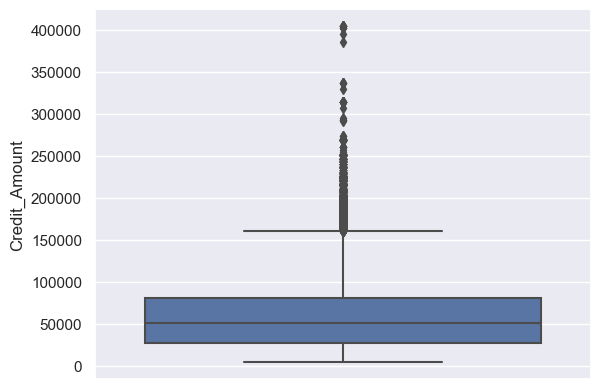

In [54]:
sns.boxplot(data = all_data_enc , y="Credit_Amount")          # outlier found
plt.show()

###### -----------  CAPPING METHOD FOR OUTLIER TREATMENT ---------

In [55]:
q1 = all_data_enc["Credit_Amount"].quantile(0.25)
q3 = all_data_enc["Credit_Amount"].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

In [56]:
all_data_enc["Credit_Amount"] = np.where(all_data_enc["Credit_Amount"] > upper , upper,
                                np.where(all_data_enc["Credit_Amount"] < lower , lower,
                                       all_data_enc["Credit_Amount"]))

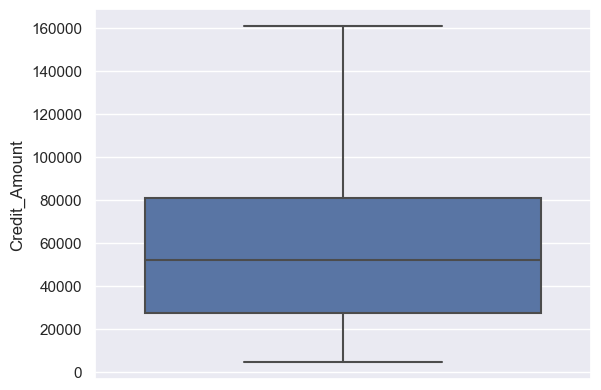

In [57]:
sns.boxplot(data = all_data_enc , y="Credit_Amount")
plt.show()

##### 2. Loan_Annuity Variable  ---- outlier treatment

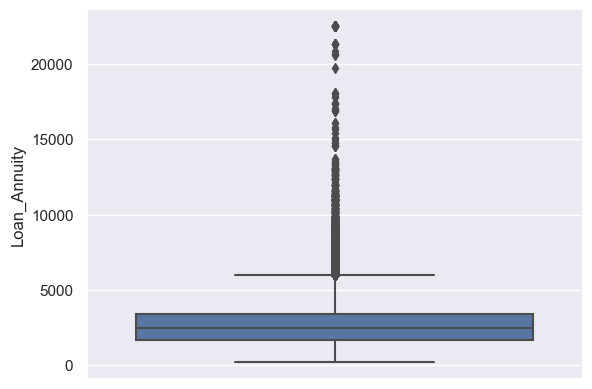

In [58]:
sns.boxplot(data = all_data_enc , y="Loan_Annuity")
plt.show()

In [59]:
q1 = all_data_enc["Loan_Annuity"].quantile(0.25)
q3 = all_data_enc["Loan_Annuity"].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

In [60]:
all_data_enc["Loan_Annuity"] = np.where(all_data_enc["Loan_Annuity"] > upper , upper,
                                np.where(all_data_enc["Loan_Annuity"] < lower , lower,
                                       all_data_enc["Loan_Annuity"]))

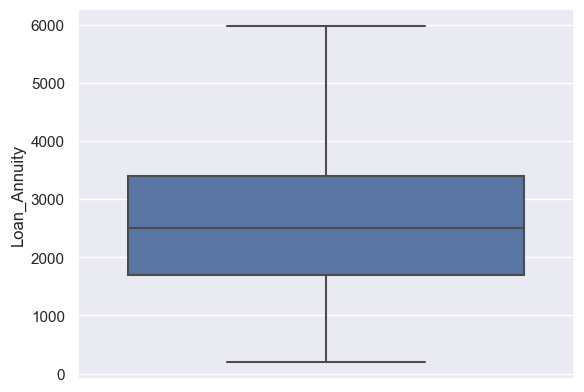

In [61]:
sns.boxplot(data = all_data_enc , y="Loan_Annuity")
plt.show()

##### 3. Phone_Change Variable  ---- outlier treatment

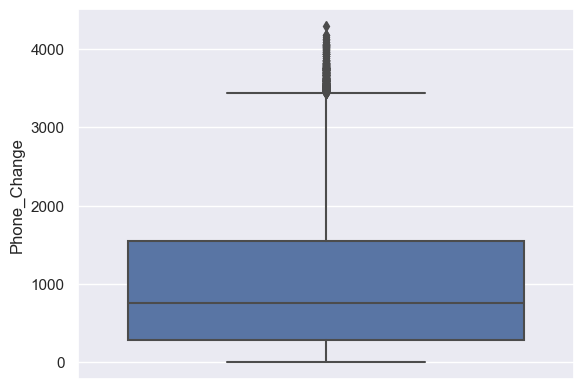

In [62]:
sns.boxplot(data = all_data_enc , y="Phone_Change")
plt.show()

In [63]:
q1 = all_data_enc["Phone_Change"].quantile(0.25)
q3 = all_data_enc["Phone_Change"].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

In [64]:
all_data_enc["Phone_Change"] = np.where(all_data_enc["Phone_Change"] > upper , upper,
                                np.where(all_data_enc["Phone_Change"] < lower , lower,
                                       all_data_enc["Phone_Change"]))

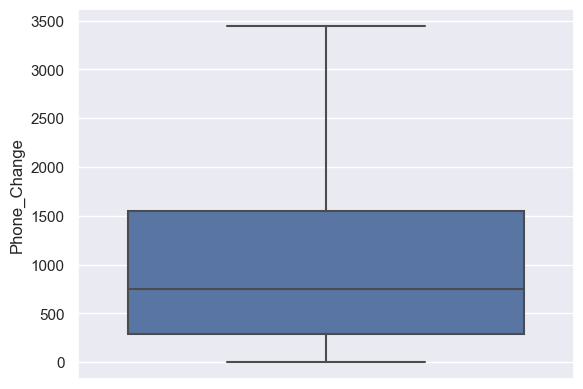

In [65]:
sns.boxplot(data = all_data_enc , y="Phone_Change")
plt.show()

## 4. FEATURE SCALING

In [66]:
all_data_enc.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0          0.0       61190.55       3416.85                    0.028663   
1          0.0       15282.00       1826.55                    0.008575   
2          1.0       59527.35       2788.20                    0.022800   
3          0.0       53870.40       2295.45                    0.010556   
4          2.0      133988.40       3547.35                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0            1.0                0.0                    2.0   
1            0.0                1.0                    2.0   
2            0.0                0.0                    2.0   
3            0.0                0.0                    2.0   
4            0.0                0.0                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default  \
0        0.478787        0.537070          63.0            1.0      0.0   
1        0.215068        0.537070         755.0            1.0      0.0   
2        0.552795        0.329655         277.0            0.0      0.0   
3        0.135182        0.631355        1700.0            3.0      0.0   
4        0.301182        0.355639         674.0            1.0      0.0   

   Accompany_Client  Client_Income_Type  Client_Education  \
0                 0                   1                 4   
1                 0                   5                 0   
2                 0                   5                 1   
3                 0                   4                 4   
4                 0                   1                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
1                      1              1                   0   
2                      3              1                   0   
3                      1              1                   0   
4                      1              0                   0   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0                    1                 14                           1   
1                    1                  8                           1   
2                    0                 13                           1   
3                    1                  8                           1   
4                    1                  8                           1   

   Client_Contact_Work_Tag  Type_Organization  data  
0                        1                 42     1  
1                        1                 11     1  
2                        1          

###### -------- SPLITTING AGAIN TRAIN AND TEST DATASET FOR FEATURE SCALING -----------

In [67]:
train_dataset = all_data_enc[all_data_enc["data"]==1]

In [68]:
train_dataset.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0          0.0       61190.55       3416.85                    0.028663   
1          0.0       15282.00       1826.55                    0.008575   
2          1.0       59527.35       2788.20                    0.022800   
3          0.0       53870.40       2295.45                    0.010556   
4          2.0      133988.40       3547.35                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0            1.0                0.0                    2.0   
1            0.0                1.0                    2.0   
2            0.0                0.0                    2.0   
3            0.0                0.0                    2.0   
4            0.0                0.0                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  Default  \
0        0.478787        0.537070          63.0            1.0      0.0   
1        0.215068        0.537070         755.0            1.0      0.0   
2        0.552795        0.329655         277.0            0.0      0.0   
3        0.135182        0.631355        1700.0            3.0      0.0   
4        0.301182        0.355639         674.0            1.0      0.0   

   Accompany_Client  Client_Income_Type  Client_Education  \
0                 0                   1                 4   
1                 0                   5                 0   
2                 0                   5                 1   
3                 0                   4                 4   
4                 0                   1                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
1                      1              1                   0   
2                      3              1                   0   
3                      1              1                   0   
4                      1              0                   0   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0                    1                 14                           1   
1                    1                  8                           1   
2                    0                 13                           1   
3                    1                  8                           1   
4                    1                  8                           1   

   Client_Contact_Work_Tag  Type_Organization  data  
0                        1                 42     1  
1                        1                 11     1  
2                        1          

In [69]:
train_dataset.shape

(121856, 38)

In [70]:
test_dataset = all_data_enc[all_data_enc["data"]==0]        # TEST DATASET

In [71]:
test_dataset = test_dataset.drop(["Default" , "data"] , axis =1)

In [72]:
test_dataset.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12202227.0        11250.0        0.0         1.0          1.0        1.0   
1  12279381.0        13500.0        1.0         1.0          1.0        1.0   
2  12222714.0        38250.0        0.0         1.0          0.0        1.0   
3  12265215.0        20250.0        0.0         0.0          1.0        0.0   
4  12203970.0        13500.0        1.0         1.0          0.0        1.0   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0          0.0      112500.00       4474.80                    0.019101   
1          3.0       49752.00       3252.15                    0.010500   
2          0.0       67500.00       3375.00                    0.032561   
3          0.0       50849.55       3814.65                    0.014520   
4          0.0       43603.20       2515.95                    0.008625   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   20063.0         2523.0             2318.0   3318.0         1.0   
1   13200.0          551.0             6972.0   3865.0         1.0   
2   15943.0         1319.0              981.0   2296.0         1.0   
3   15634.0         1510.0             4975.0   6121.0         1.0   
4   15811.0         1075.0             5478.0   3618.0         1.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0            0.0                0.0                    2.0   
1            1.0                0.0                    5.0   
2            0.0                1.0                    2.0   
3            1.0                1.0                    1.0   
4            0.0                0.0                    2.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      4.0                      16.0   
1                 3.0                      3.0                      18.0   
2                 1.0                      2.0                      19.0   
3                 2.0                      6.0                      20.0   
4                 2.0                      1.0                      13.0   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  \
0        0.757151        0.629674         716.0            2.0   
1        0.342269        0.537070         181.0            1.0   
2        0.683665        0.537070         281.0            1.0   
3        0.229950        0.672243        1442.0            4.0   
4        0.566971        0.730987         927.0            1.0   

   Accompany_Client  Client_Income_Type  Client_Education  \
0                 5                   5                 4   
1                 0                   5                 4   
2                 0                   1                 0   
3                 0                   2                 4   
4                 0                   5                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
1                      1              0                   0   
2                      1              0                   1   
3                      2              1                   0   
4                      1              0                   0   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0                    1                  8                           1   
1                    1                  8                           0   
2                    1                 10                           1   
3                    1                  8                           0   
4                    1                 10                           1   

   Client_Contact_Work_Tag  Type_Organization  
0                        1                 42  
1                        1                 42  
2                        1                  5  
3                        0                 30  
4           

In [73]:
test_dataset.shape

(80900, 36)

### SPLIT TRAIN DATA INTO  INDEPENDENT VARIABLE (X)  AND DEPENDENT VARIABLE (Y)

In [75]:
x = train_dataset.drop(["Default" , "data"], axis=1)
y = train_dataset[["Default"]]

In [76]:
x.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509.0         6750.0        0.0         0.0          1.0        0.0   
1  12138936.0        20250.0        1.0         0.0          1.0        1.0   
2  12181264.0        18000.0        0.0         0.0          1.0        0.0   
3  12188929.0        15750.0        0.0         0.0          1.0        1.0   
4  12133385.0        33750.0        1.0         0.0          1.0        0.0   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0          0.0       61190.55       3416.85                    0.028663   
1          0.0       15282.00       1826.55                    0.008575   
2          1.0       59527.35       2788.20                    0.022800   
3          0.0       53870.40       2295.45                    0.010556   
4          2.0      133988.40       3547.35                    0.020713   

   Age_Days  Employed_Days  Registration_Days  ID_Days  Mobile_Tag  \
0   13957.0         1062.0             6123.0    383.0         1.0   
1   14162.0         4129.0             7833.0     21.0         1.0   
2   16790.0         5102.0             4493.0    331.0         1.0   
3   23195.0       365243.0             4493.0    775.0         1.0   
4   11366.0         2977.0             5516.0   4043.0         1.0   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0            1.0                0.0                    2.0   
1            0.0                1.0                    2.0   
2            0.0                0.0                    2.0   
3            0.0                0.0                    2.0   
4            0.0                0.0                    4.0   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0                 2.0                      6.0                      17.0   
1                 2.0                      3.0                      10.0   
2                 2.0                      4.0                      12.0   
3                 3.0                      2.0                      15.0   
4                 1.0                      3.0                      12.0   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  \
0        0.478787        0.537070          63.0            1.0   
1        0.215068        0.537070         755.0            1.0   
2        0.552795        0.329655         277.0            0.0   
3        0.135182        0.631355        1700.0            3.0   
4        0.301182        0.355639         674.0            1.0   

   Accompany_Client  Client_Income_Type  Client_Education  \
0                 0                   1                 4   
1                 0                   5                 0   
2                 0                   5                 1   
3                 0                   4                 4   
4                 0                   1                 4   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0                      1              1                   0   
1                      1              1                   0   
2                      3              1                   0   
3                      1              1                   0   
4                      1              0                   0   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0                    1                 14                           1   
1                    1                  8                           1   
2                    0                 13                           1   
3                    1                  8                           1   
4                    1                  8                           1   

   Client_Contact_Work_Tag  Type_Organization  
0                        1                 42  
1                        1                 11  
2                        1                 42  
3                        1                  5  
4           

In [77]:
y.head()

Default
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0

###### -------- APPLYING FEATURE SCALING - STANDARD SCALER ---------

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)
sc_x.columns = x.columns
sc_x.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0 -0.523626      -0.882958  -0.706223    -0.68975      1.03194  -1.532308   
1 -0.625199       0.304060   1.415982    -0.68975      1.03194   0.652610   
2  0.578094       0.106223  -0.706223    -0.68975      1.03194  -1.532308   
3  0.795993      -0.091613  -0.706223    -0.68975      1.03194   0.652610   
4 -0.783002       1.491077   1.415982    -0.68975      1.03194  -1.532308   

   Child_Count  Credit_Amount  Loan_Annuity  Population_Region_Relative  \
0    -0.561872       0.055020      0.572429                    0.015324   
1    -0.561872      -1.168166     -0.657237                   -0.034243   
2     0.824417       0.010706      0.086339                    0.000857   
3    -0.561872      -0.140018     -0.294670                   -0.029355   
4     2.210706       1.994644      0.673335                   -0.004292   

   Age_Days  Employed_Days  Registration_Days   ID_Days  Mobile_Tag  \
0 -0.479319      -0.467094           0.335631 -1.773848    0.002865   
1 -0.431660      -0.444758           0.829459 -2.019220    0.002865   
2  0.179313      -0.437672          -0.135094 -1.809095    0.002865   
3  1.668385       2.185090          -0.135094 -1.508141    0.002865   
4 -1.081690      -0.453147           0.160337  0.706990    0.002865   

   Homephone_Tag  Workphone_Working  Client_Family_Members  \
0       1.996887          -0.625467              -0.167366   
1      -0.500779           1.598805              -0.167366   
2      -0.500779          -0.625467              -0.167366   
3      -0.500779          -0.625467              -0.167366   
4      -0.500779          -0.625467               2.045349   

   Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
0           -0.058959                 1.632693                  1.528559   
1           -0.058959                -0.089892                 -0.637943   
2           -0.058959                 0.484303                 -0.018942   
3            1.943397                -0.664088                  0.909559   
4           -2.061315                -0.089892                 -0.018942   

   Score_Source_2  Score_Source_3  Phone_Change  Credit_Bureau  \
0       -0.058106        0.117363     -1.095265      -0.433192   
1       -0.422945        0.117363     -0.246015      -0.433192   
2        0.044280       -1.089503     -0.832635      -1.006571   
3       -0.533463        0.665968      0.913725       0.713567   
4       -0.303812       -0.938314     -0.345422      -0.433192   

   Accompany_Client  Client_Income_Type  Client_Education  \
0         -0.467961           -1.628661          0.618177   
1         -0.467961            0.773832         -1.697275   
2         -0.467961            0.773832         -1.118412   
3         -0.467961            0.173208          0.618177   
4         -0.467961           -1.628661          0.618177   

   Client_Marital_Status  Client_Gender  Loan_Contract_Type  \
0              -0.296101       0.711791           -0.316372   
1              -0.296101       0.711791           -0.316372   
2               2.984653       0.711791           -0.316372   
3              -0.296101       0.711791           -0.316372   
4              -0.296101      -1.404908           -0.316372   

   Client_Housing_Type  Client_Occupation  Client_Permanent_Match_Tag  \
0            -0.114781           1.702455                     0.28915   
1            -0.114781           0.027734                     0.28915   
2            -1.927248           1.423335                     0.28915   
3            -0.114781           0.027734                     0.28915   
4            -0.114781           0.027734                     0.28915   

   Client_Contact_Work_Tag  Type_Organization  
0                 0.467309           1.293080  
1                 0.467309          -0.496961  
2                 0.467309           1.293080  
3                 0.467309          -0.843421  
4               

## 5. IMBALANCE TREATMENT

In [79]:
y.value_counts()

Default
0.0        112011
1.0          9845
dtype: int64

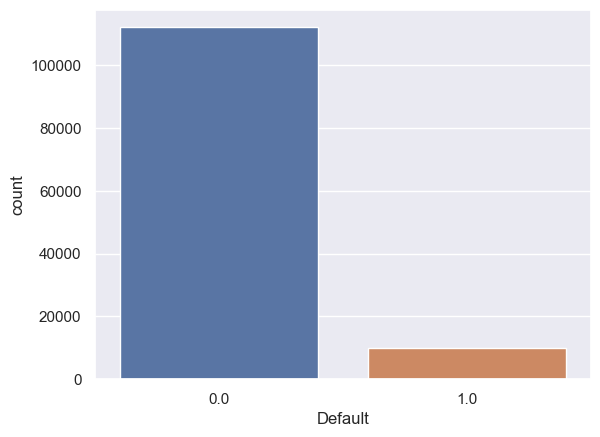

In [89]:
sns.countplot(data = train_dataset , x="Default" )
plt.show()

##### USING OVERSAMPLING METHOD - BALANCING THE DATASET

In [80]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [81]:
x_ros , y_ros = ros.fit_resample(sc_x , y)
y_ros.value_counts()

Default
0.0        112011
1.0        112011
dtype: int64

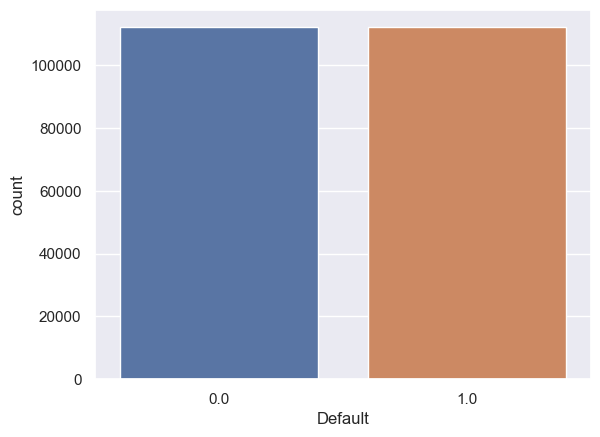

In [90]:
sns.countplot(data = y_ros , x="Default" )      # AFTER BALANCING DATA
plt.show()

# EXPLORATORY DATA ANALYSIS (EDA)

### 1. DISTRIBUTION PLOT

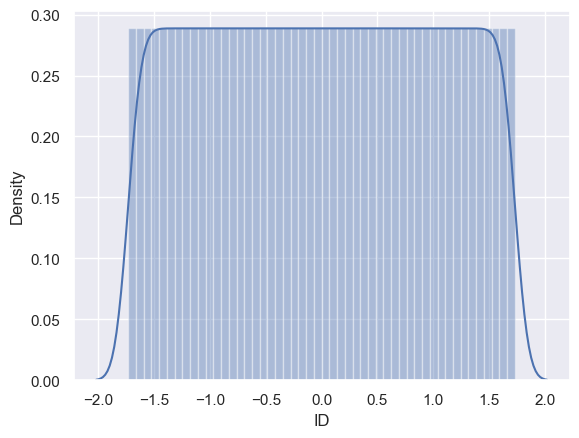

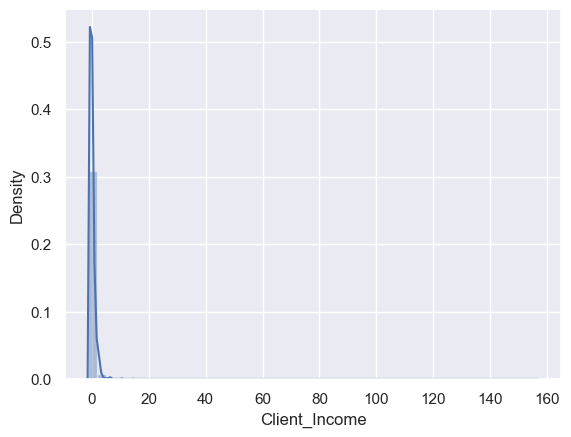

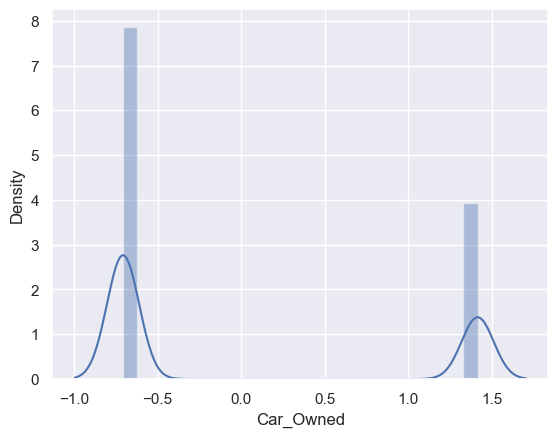

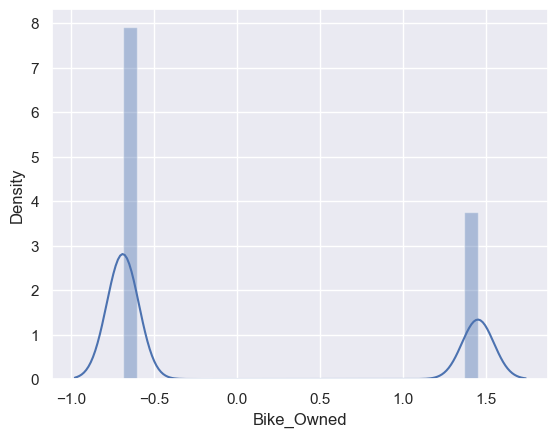

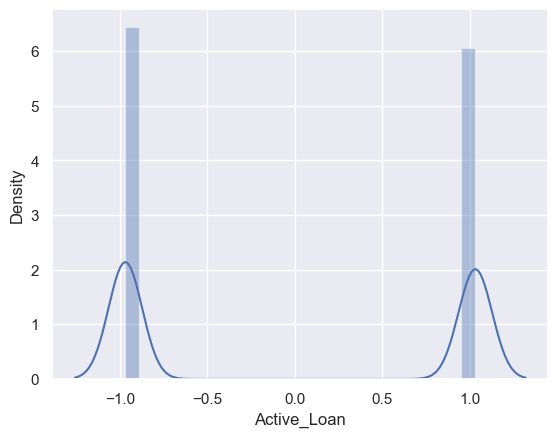

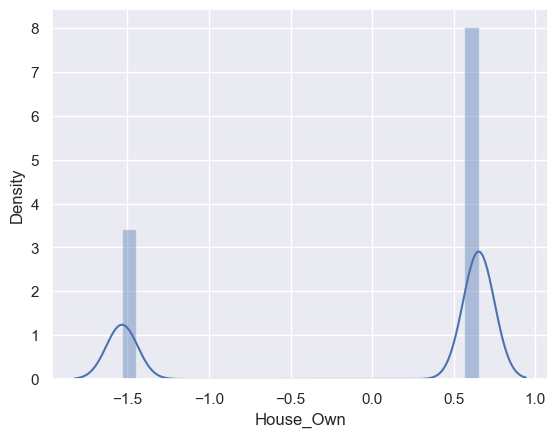

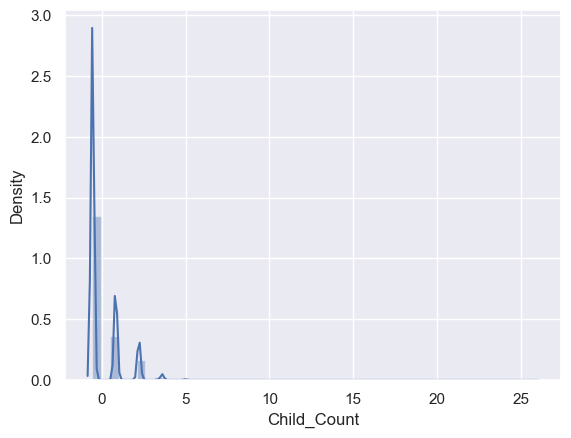

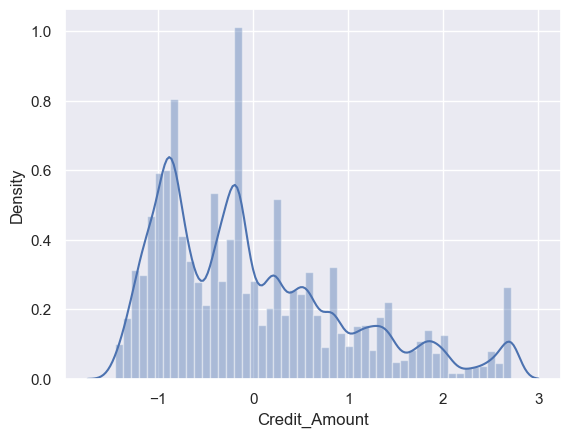

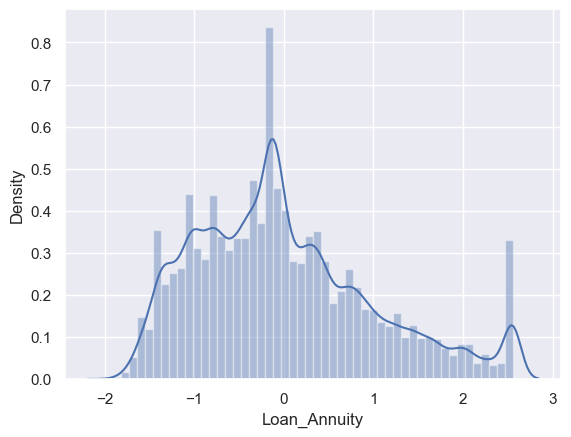

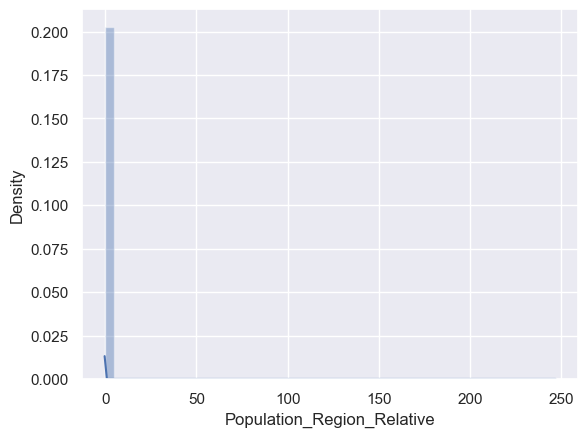

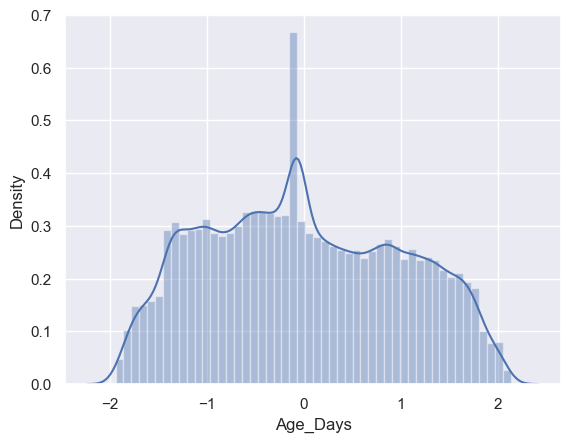

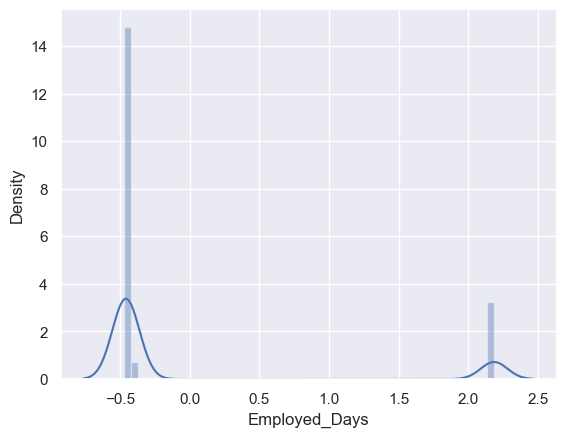

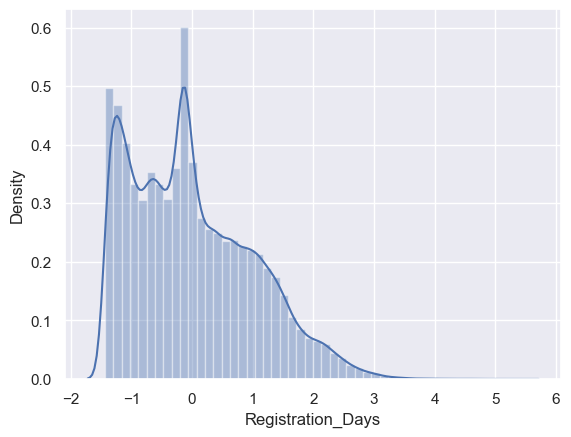

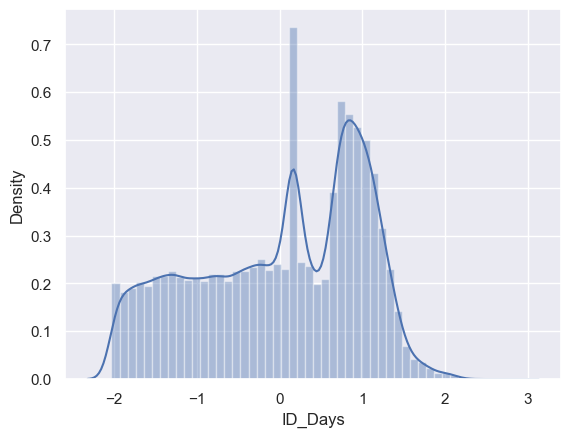

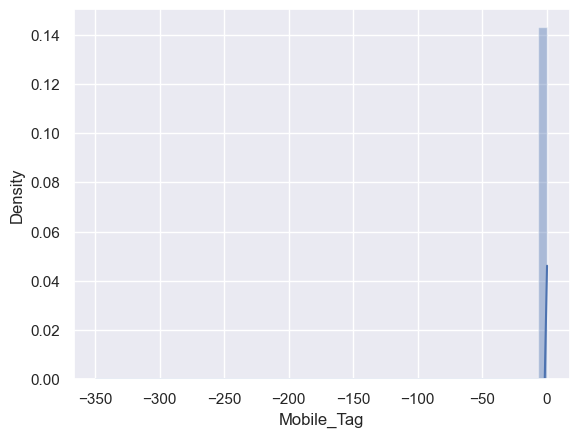

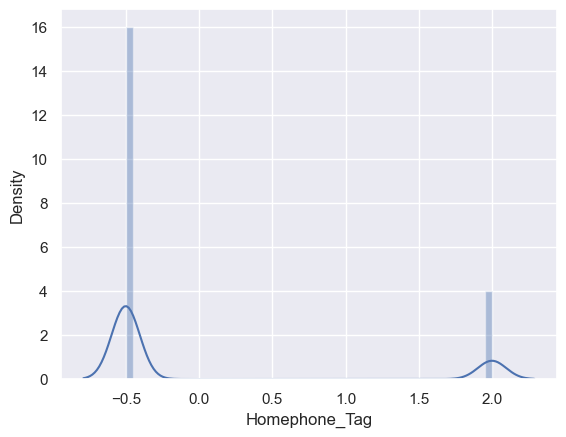

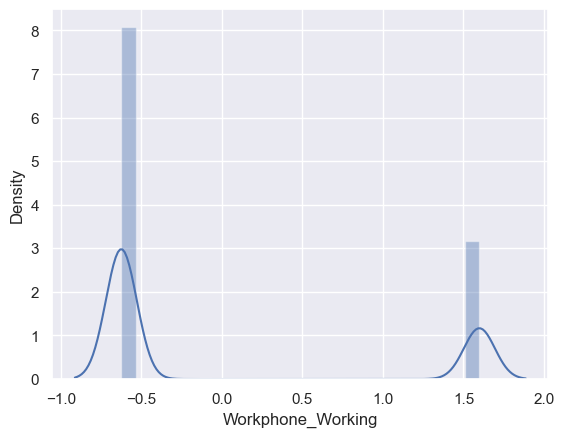

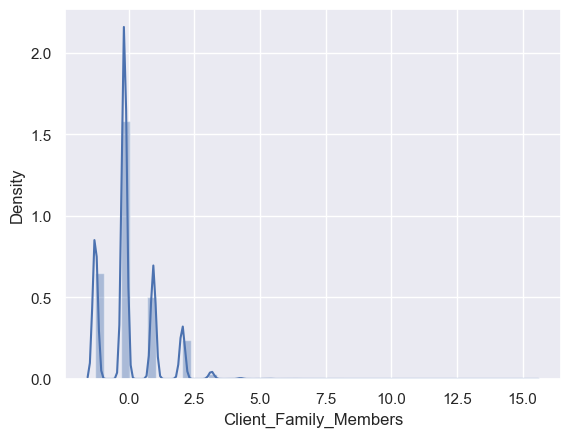

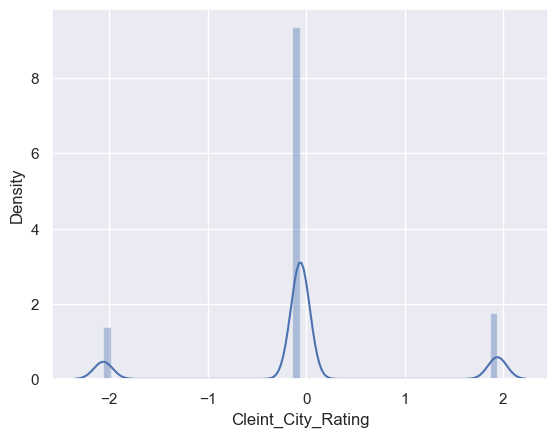

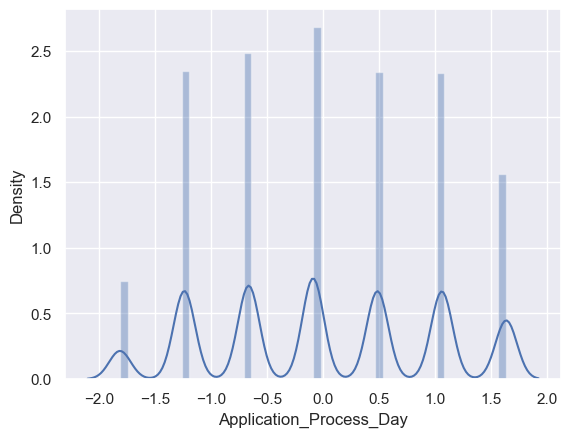

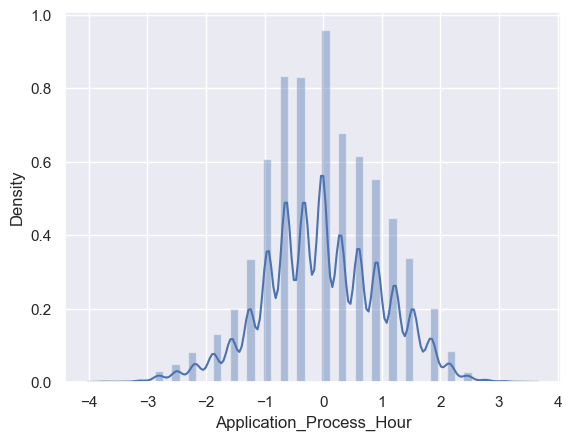

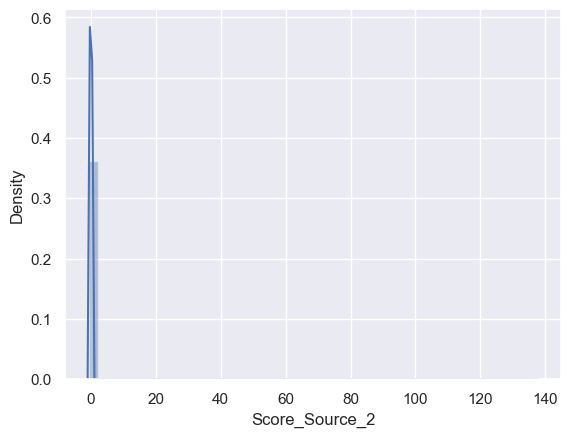

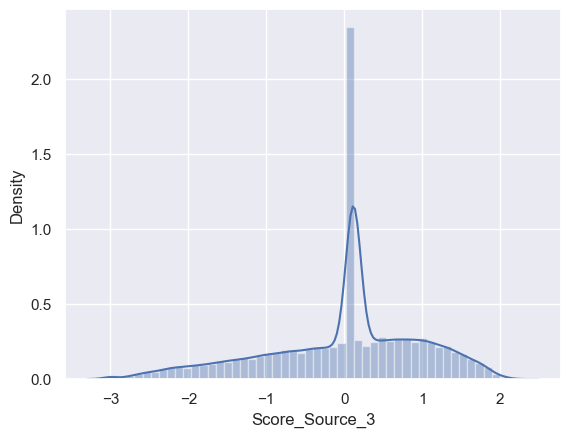

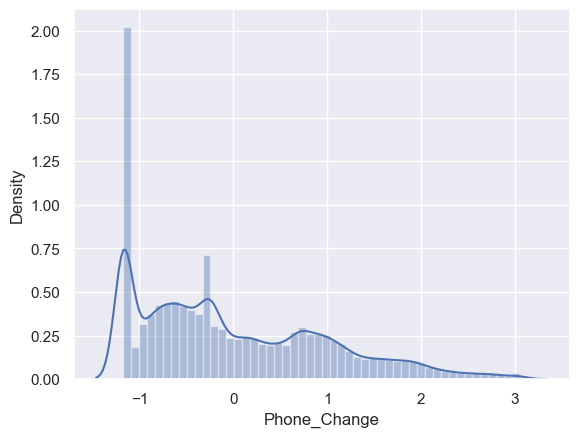

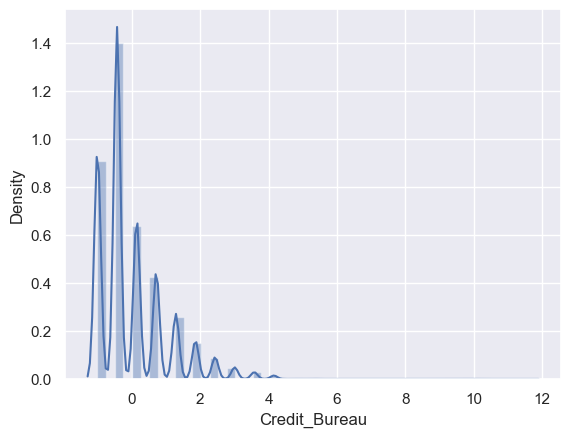

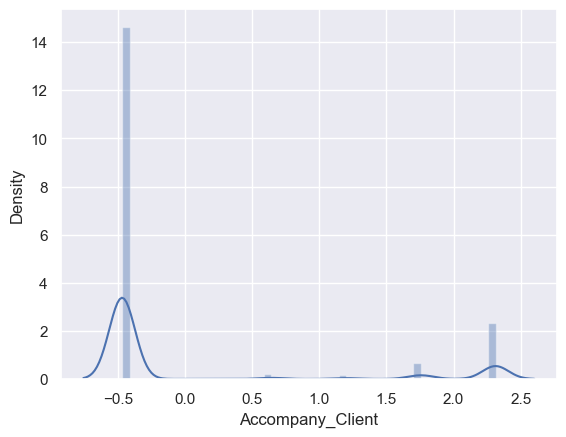

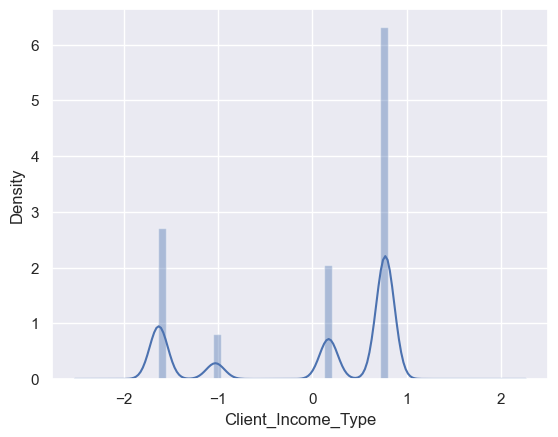

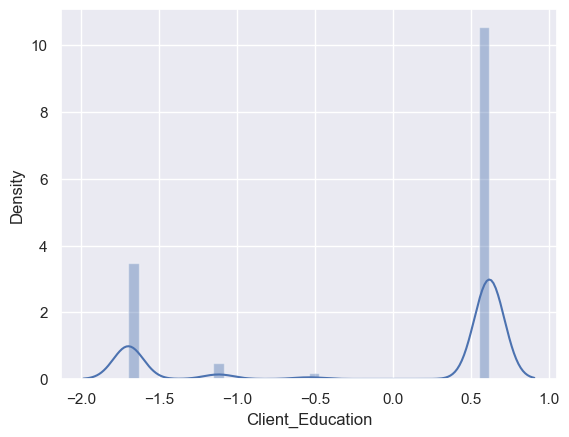

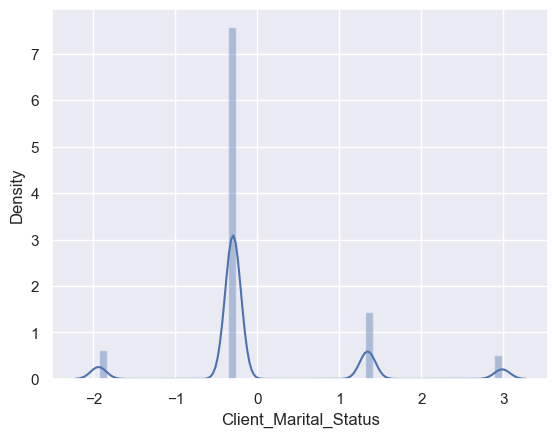

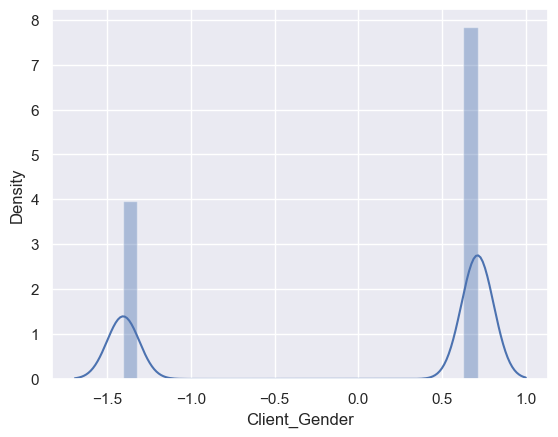

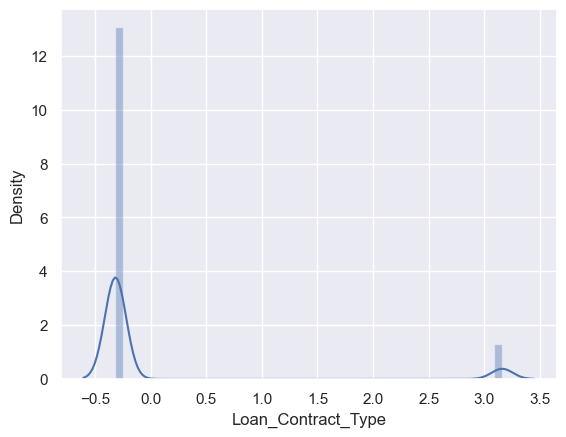

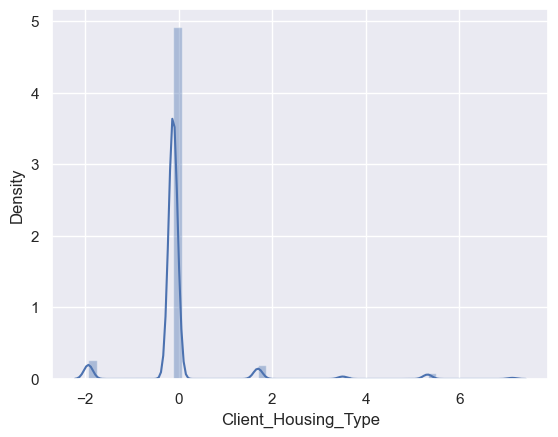

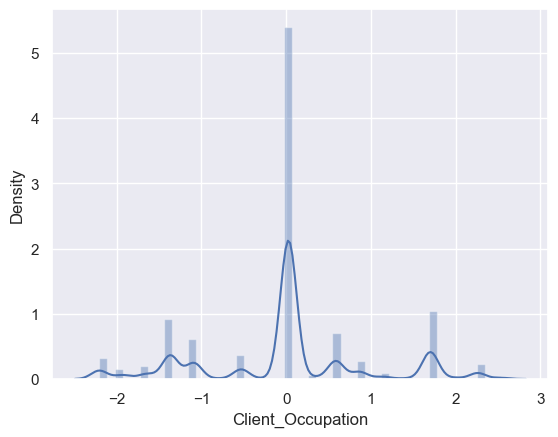

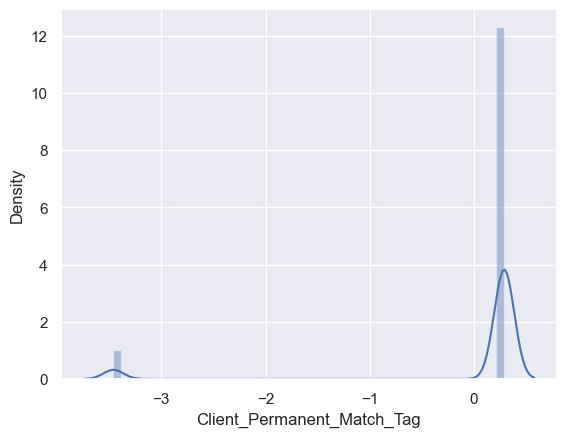

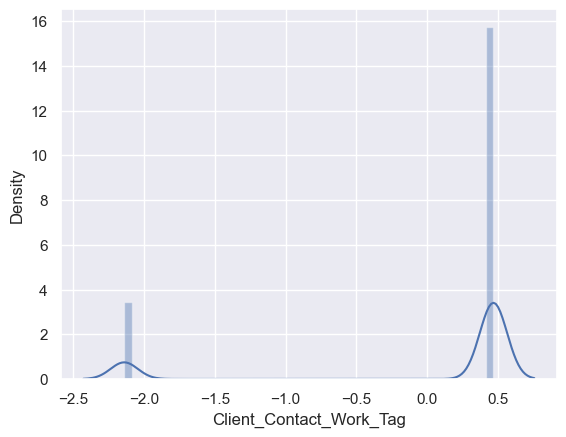

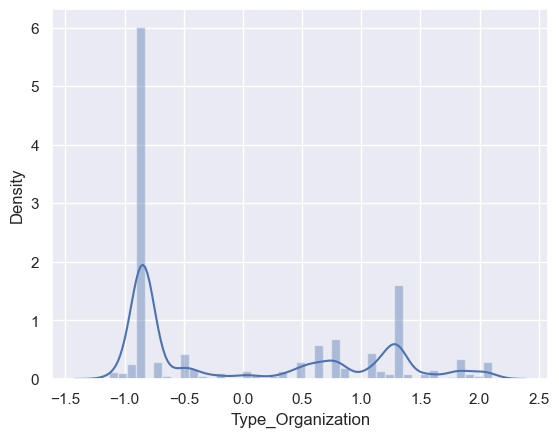

In [146]:
def distplots(col):
    sns.distplot(sc_x[col])
    plt.show()
for i in list(sc_x.columns)[0:]:
    distplots(i)

### 2. HEAT MAP - FOR FINDING CORRELATION

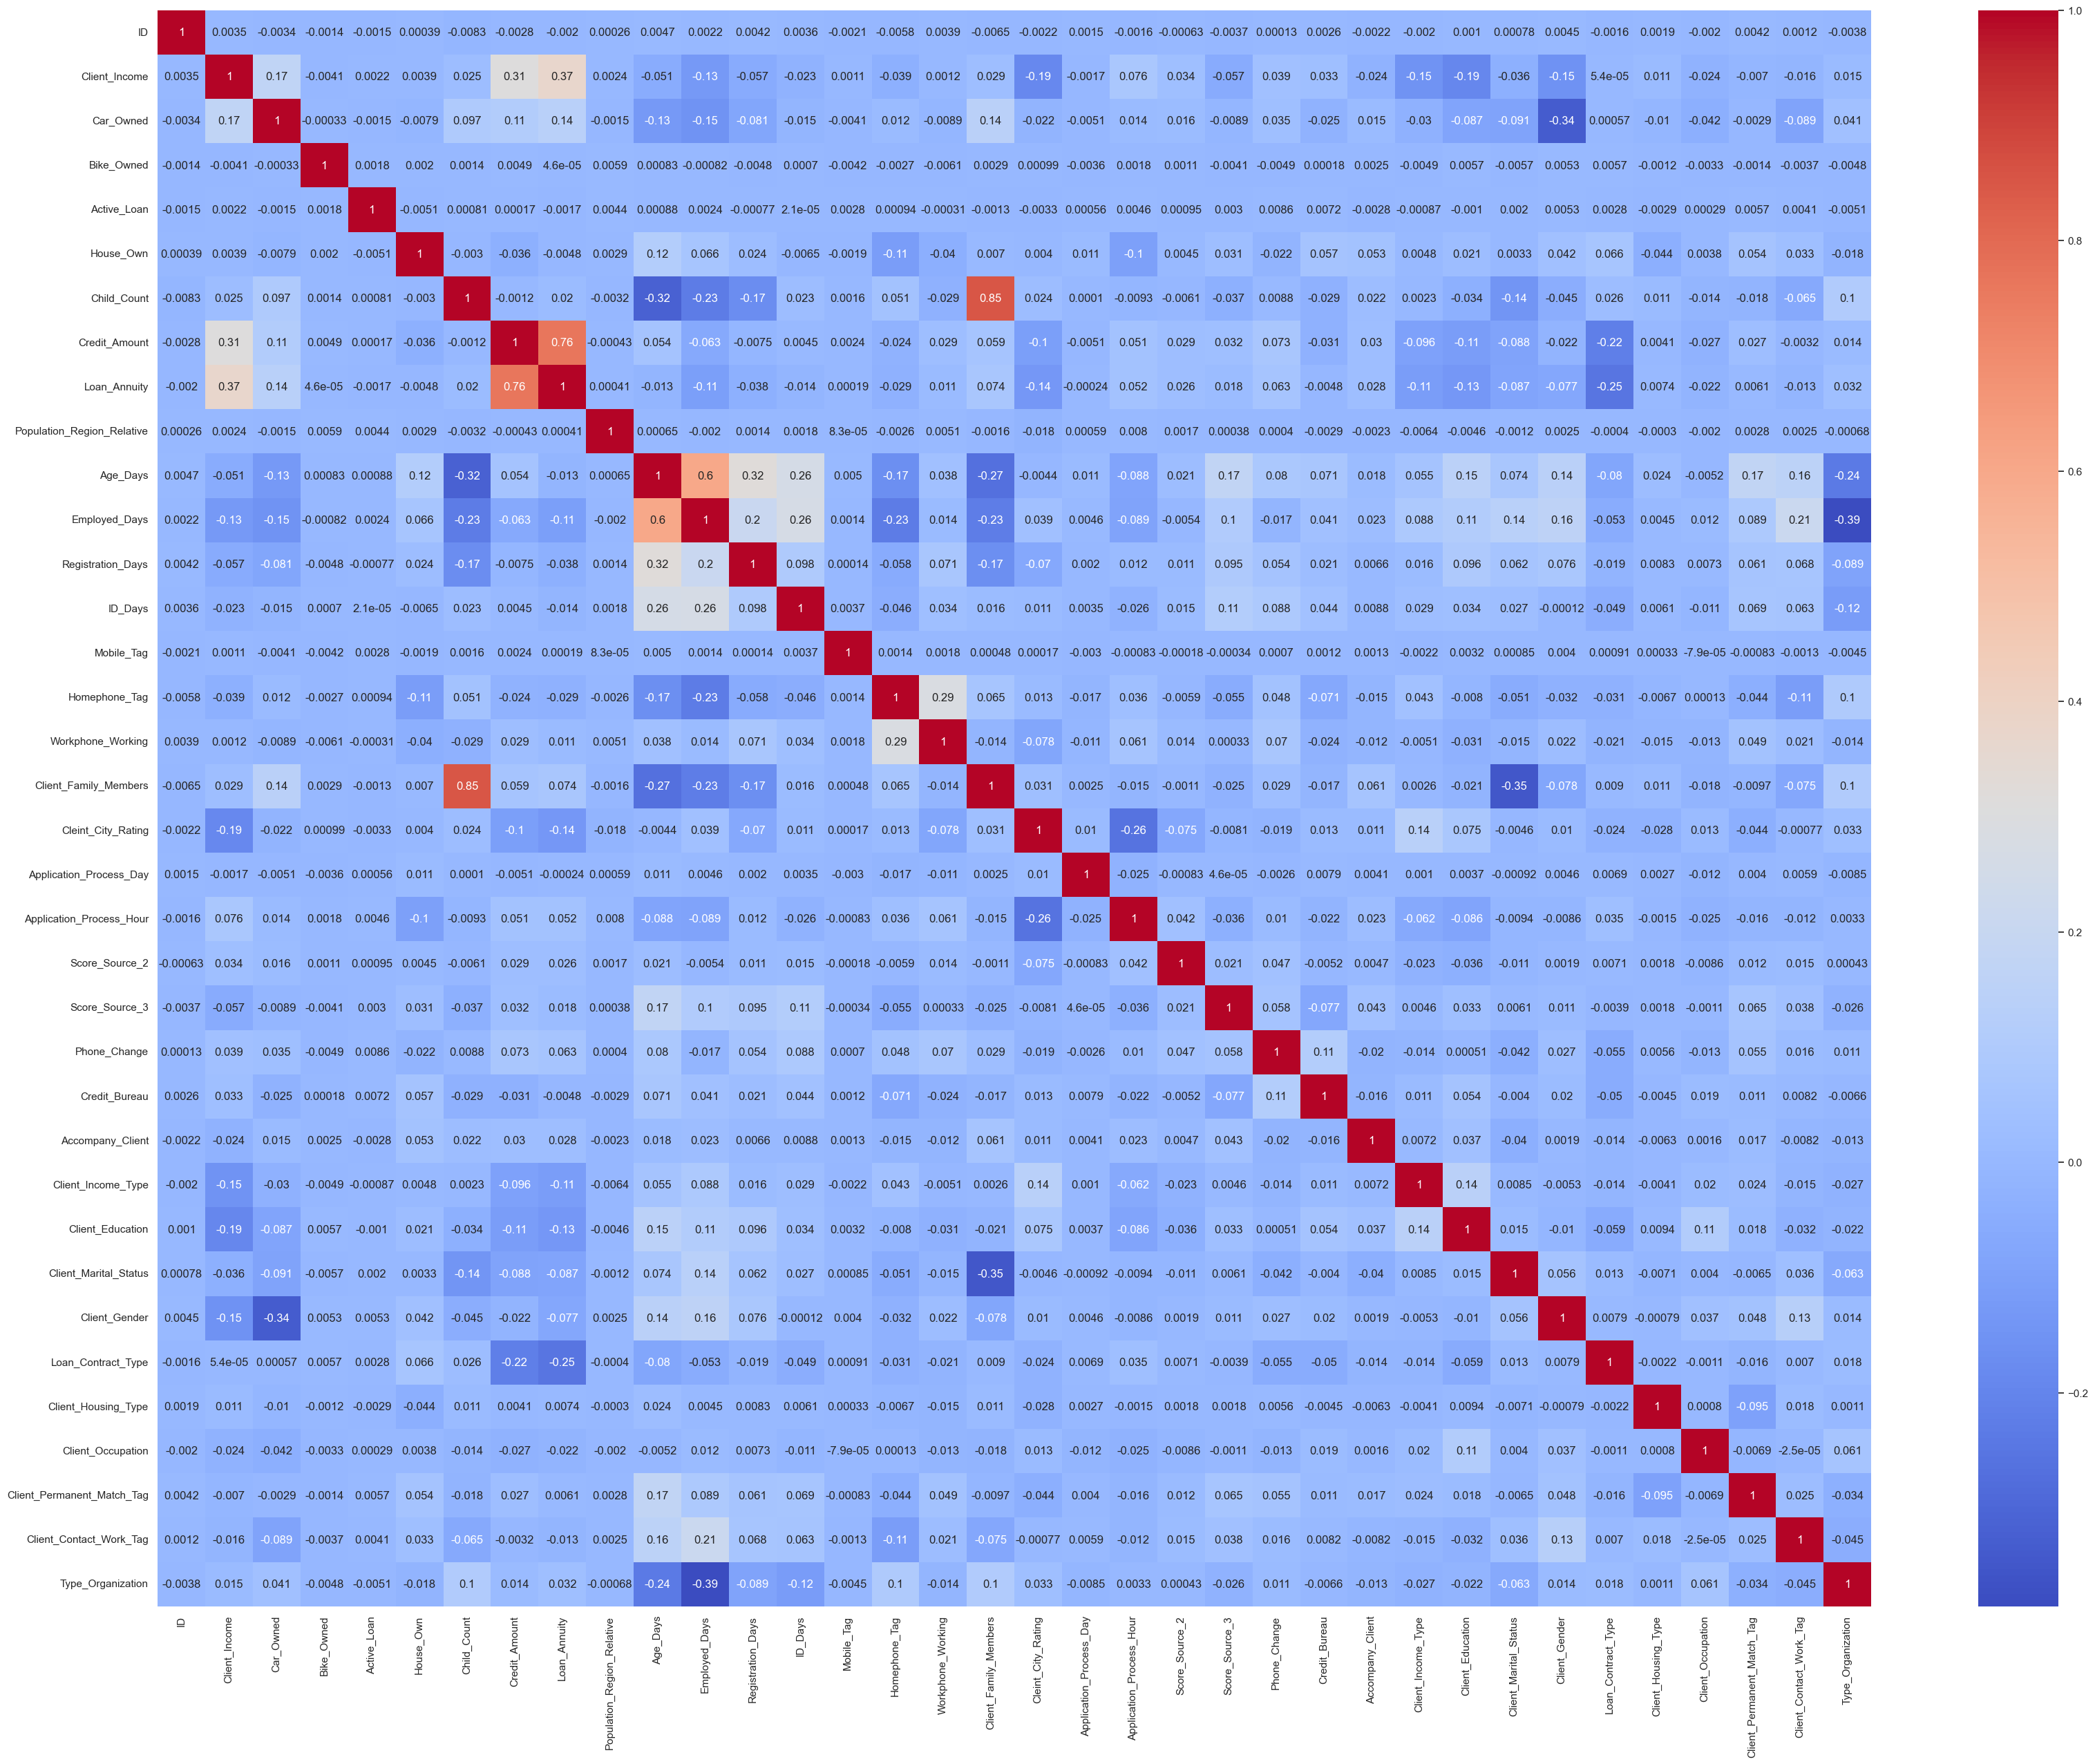

In [151]:
plt.figure(figsize=(40,30))
corr1 = sc_x.corr()
sns.heatmap(corr1 , annot=True , cmap= "coolwarm")
plt.show()

####   ---------THERE IS NO CORRELATION IN THE DATSET ----------

### 3. HISTOGRAM

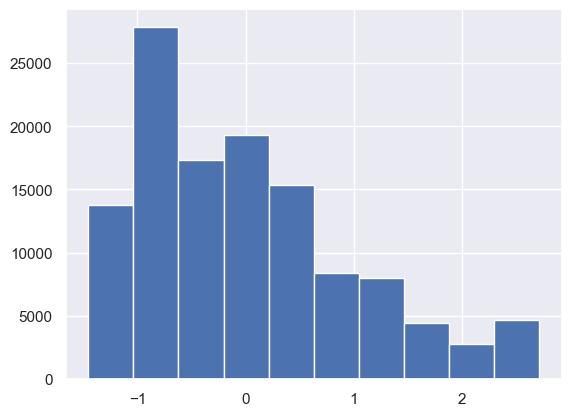

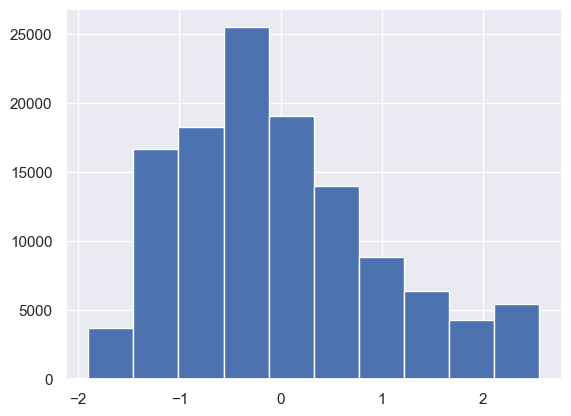

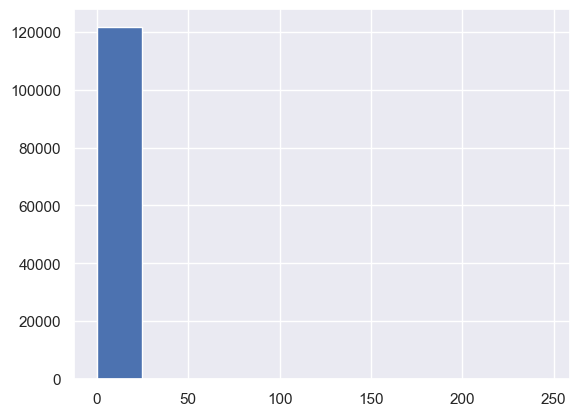

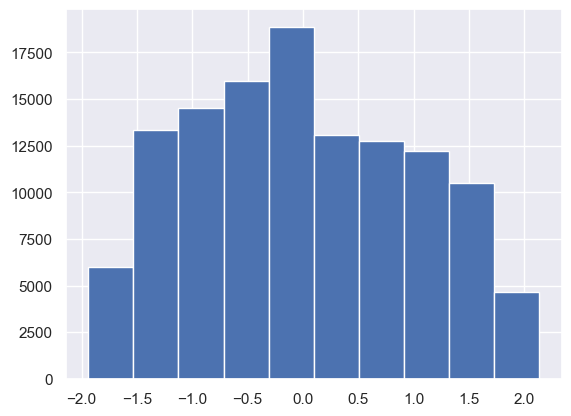

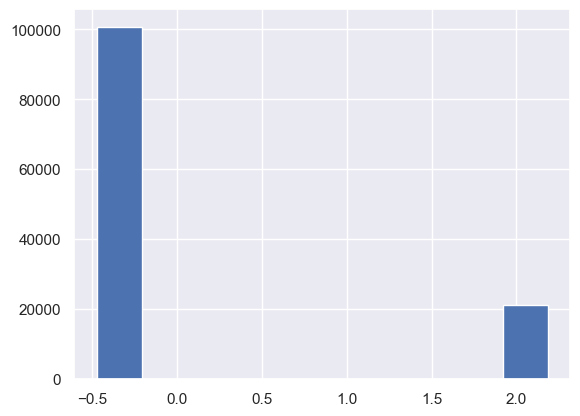

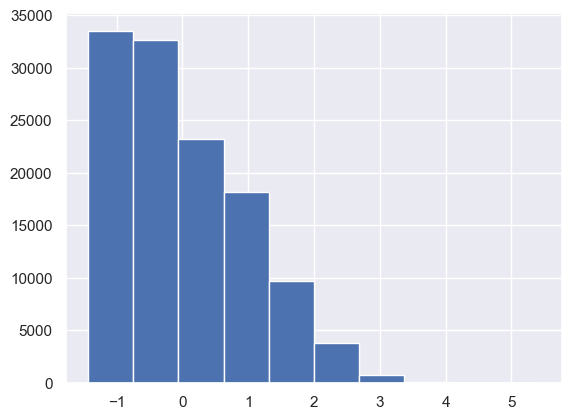

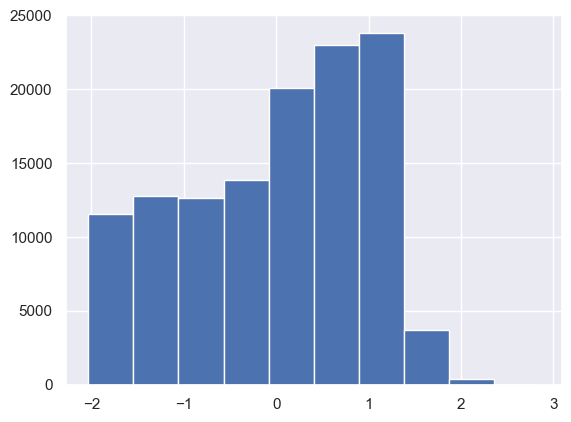

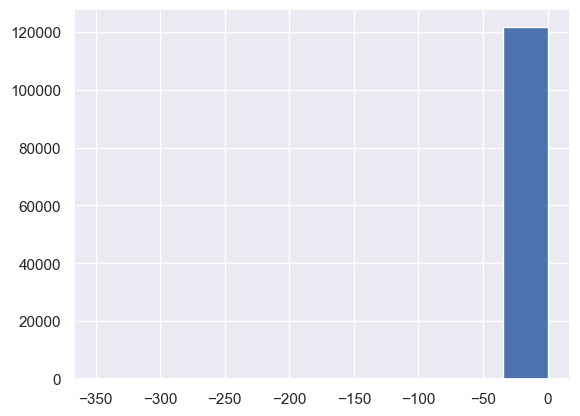

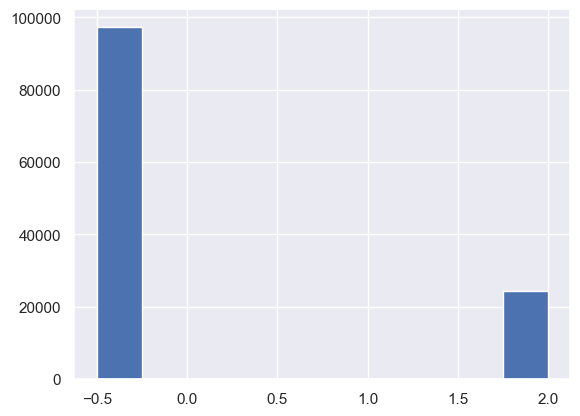

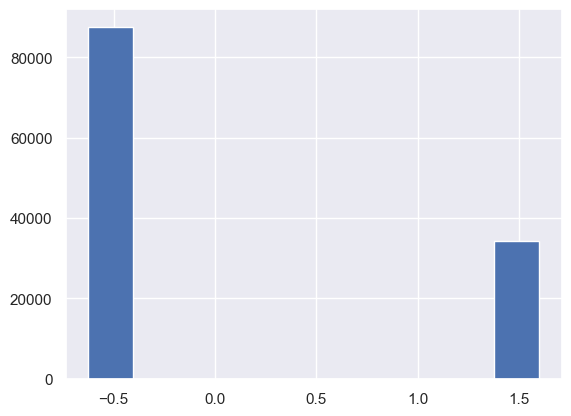

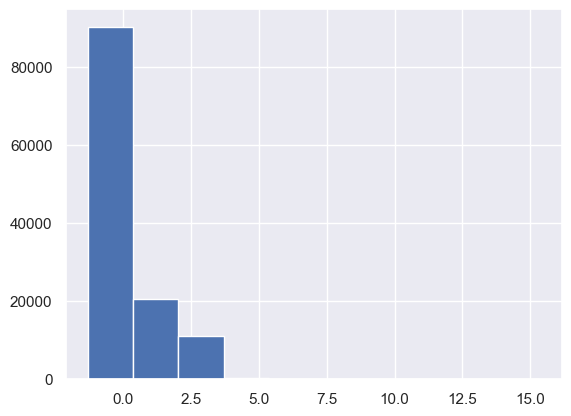

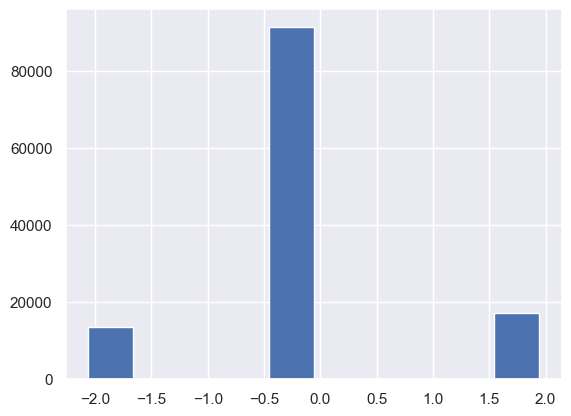

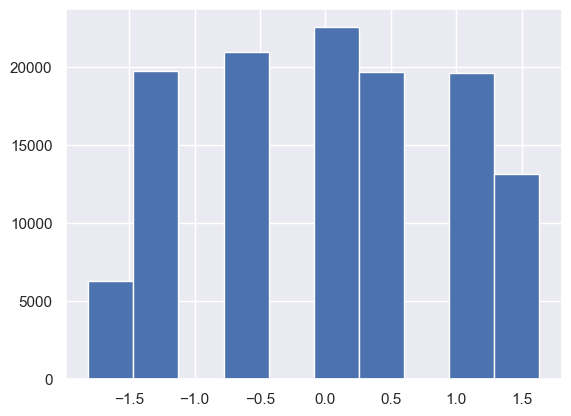

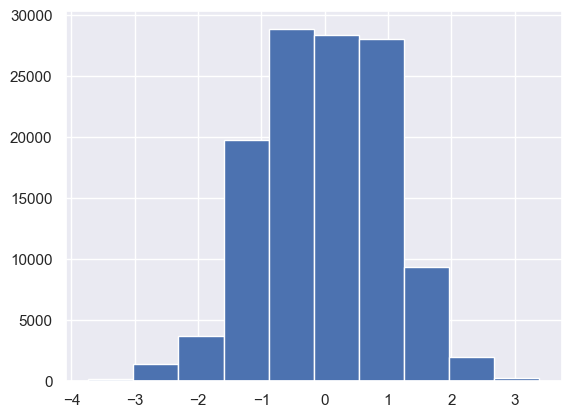

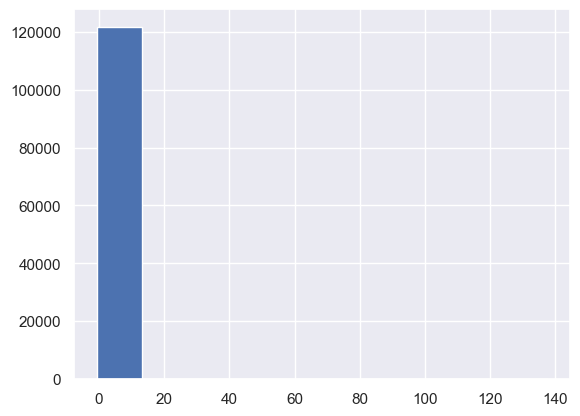

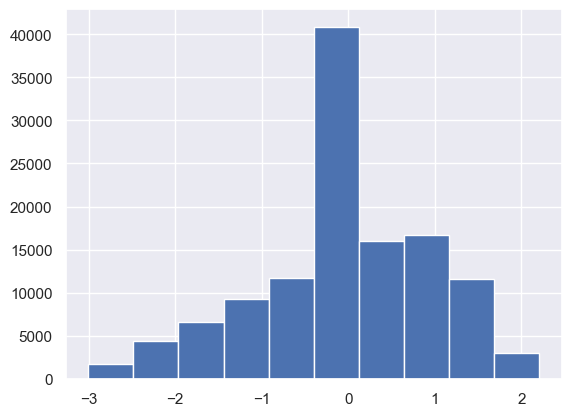

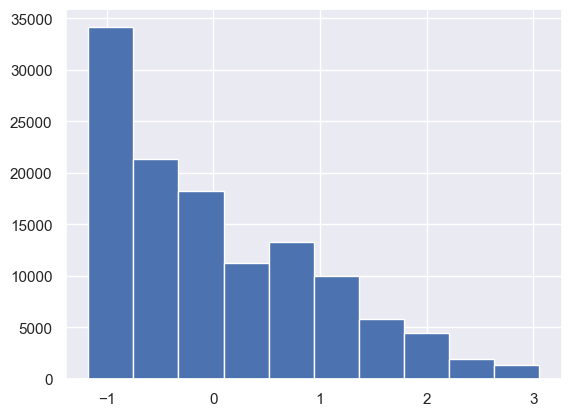

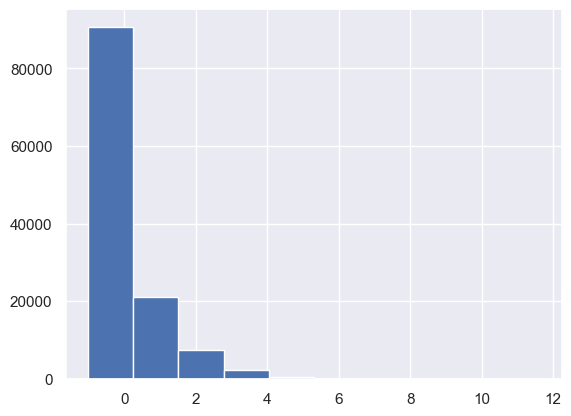

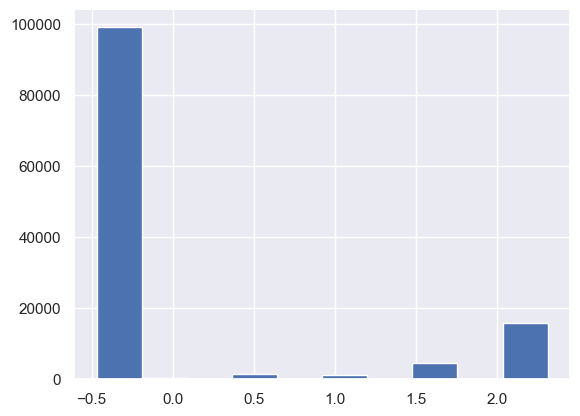

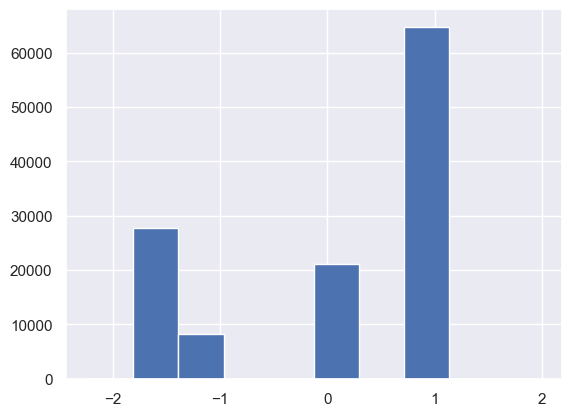

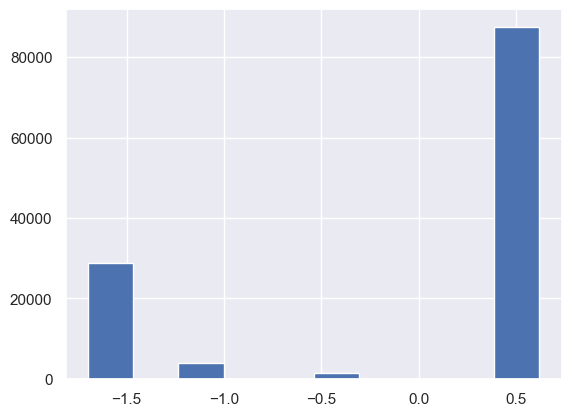

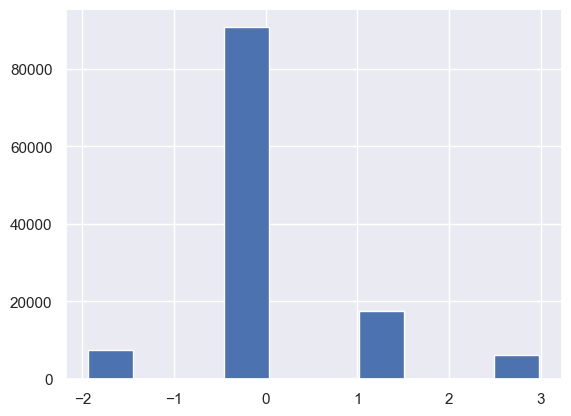

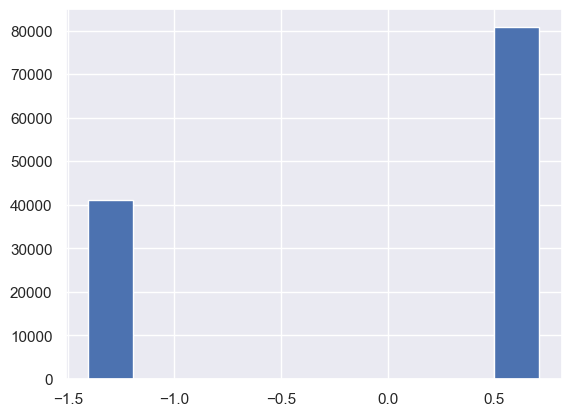

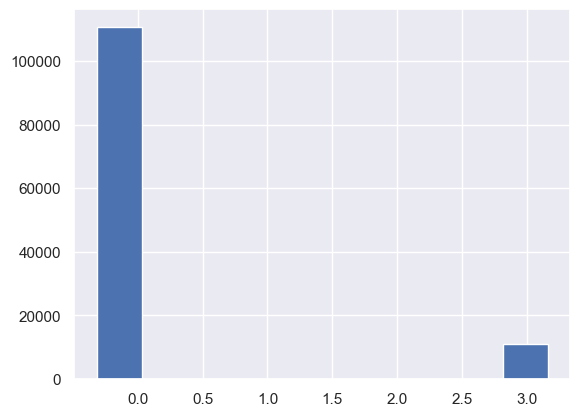

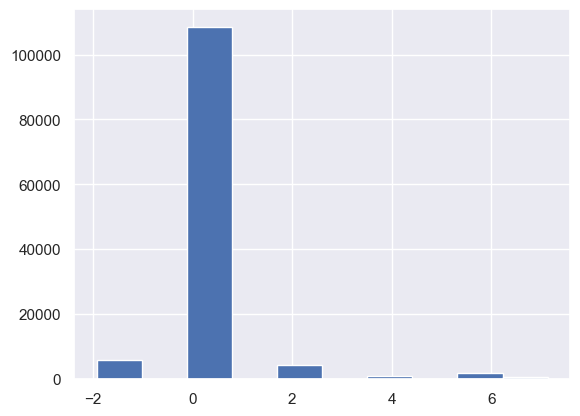

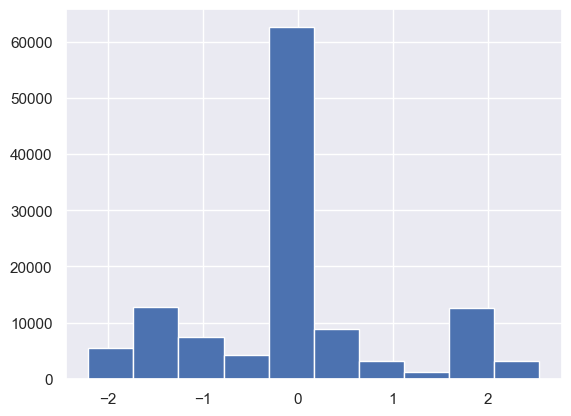

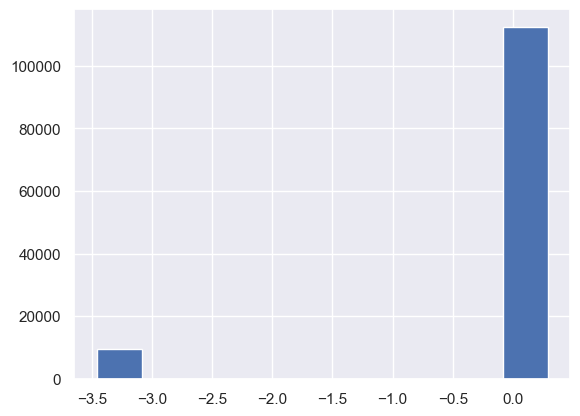

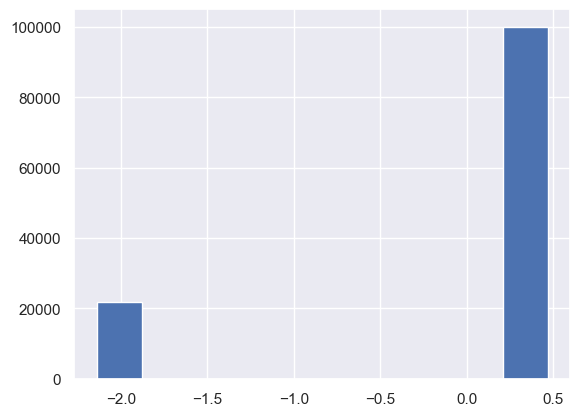

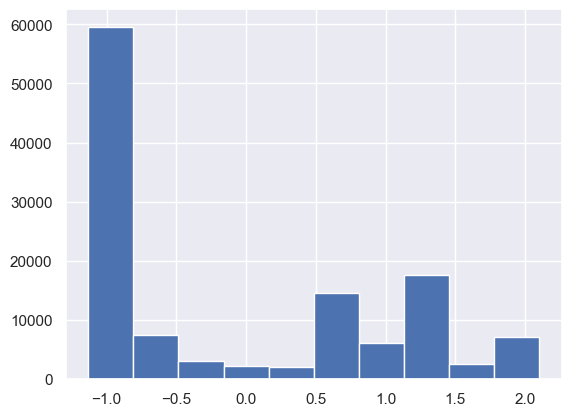

In [154]:
def histograms(col):
    plt.hist(sc_x[col])
    plt.show()
for i in list(sc_x.columns)[7:]:
    histograms(i)

### 4. CATPLOT

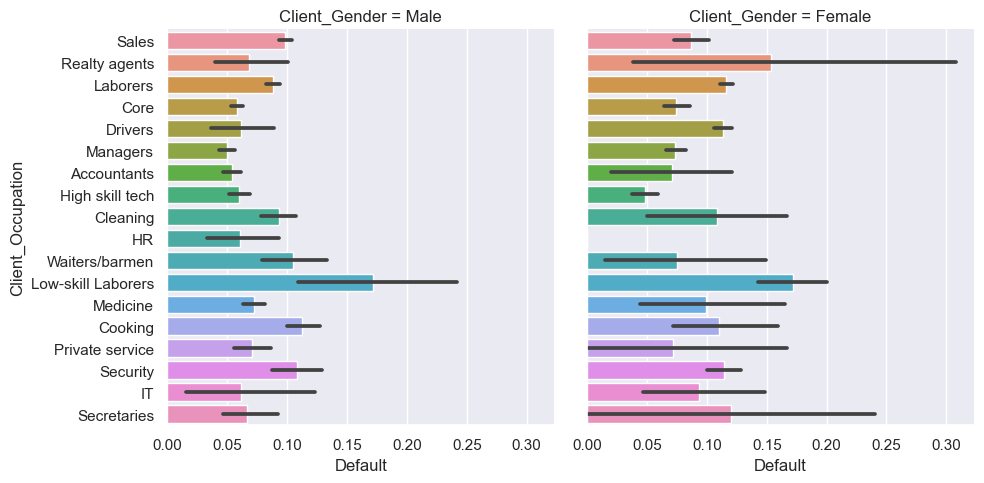

In [159]:
sns.catplot(data=train , x='Default' , y='Client_Occupation' ,kind = 'bar', col = "Client_Gender")

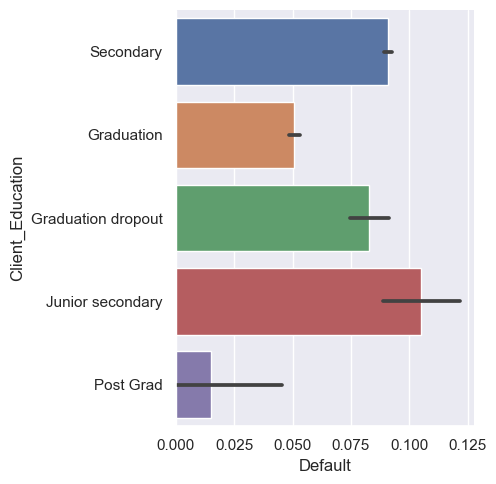

In [164]:
sns.catplot(data=train , x='Default' , y='Client_Education' ,kind = 'bar')

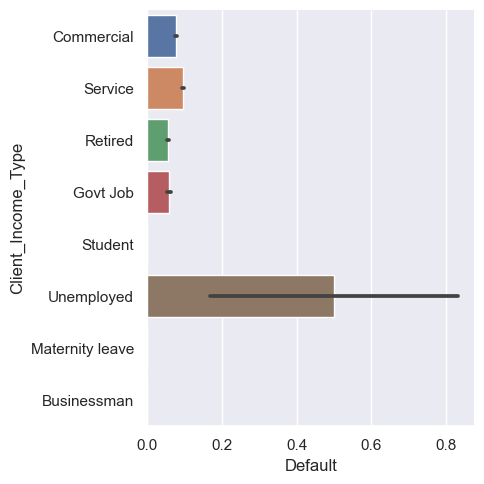

In [165]:
sns.catplot(data=train , x='Default' , y='Client_Income_Type' ,kind = 'bar')

### 5. ADVANCED EDA - DTALE

In [ ]:
import dtale
import dtale.app as dtale_app
dtale.show(df_new)

# SPLIT DATA INTO TRAINING  AND TEST

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=101)

# BUILDING  MODEL 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import  accuracy_score , confusion_matrix , classification_report

## Applying all the model together

In [86]:
# LogisticRegression

logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree

dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest

rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier

bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# GradientBoostingClassifier

gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier

xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
                          
# KNN

knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [88]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),
                                  ('gd', gd),('xg', xg),('kn', kn)],voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

          Method Used  Accuracy
0  LogisticRegression  0.664435
1        DecisionTree  0.958643
2        RandomForest  0.998549
3             Bagging  0.991965
4    GradientBoosting  0.685772
5             XGBoost  0.824662
6   KNearestNeighbors  0.885482
7    VotingClassifier  0.954670
AxesSubplot(0.125,0.11;0.775x0.77)


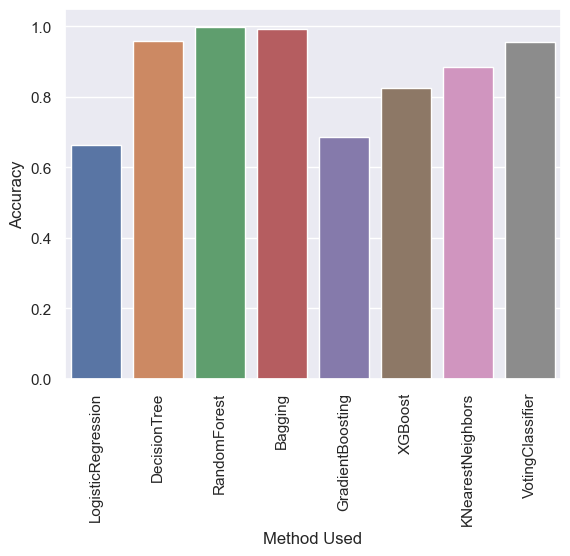

In [91]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging',
         'GradientBoosting', 'XGBoost', 'KNearestNeighbors',
          'VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_gd, 
         accuracy_xg,accuracy_knn , accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, gdb, xgb,knn ,evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

###### ---------------HIGHEST ACCURACY : RANDOM FOREST MODEL - 99.8%  AND BAGGING CLASSIFIER - 99.1%  Trying both the models individually and predict which model performing well--------

## RANDOM FOREST CLASSIFIER MODEL

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
y_pred_train_rf = rfc.predict(x_train)
y_pred_test_rf = rfc.predict(x_test)

In [166]:
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89505
         1.0       1.00      1.00      1.00     89712

    accuracy                           1.00    179217
   macro avg       1.00      1.00      1.00    179217
weighted avg       1.00      1.00      1.00    179217


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22506
         1.0       1.00      1.00      1.00     22299

    accuracy                           1.00     44805
   macro avg       1.00      1.00      1.00     44805
weighted avg       1.00      1.00      1.00     44805



In [95]:
print("TRAIN ACCURACY RF:" , accuracy_score(y_train , y_pred_train_rf).round(3))
print("TEST  ACCURACY RF:" , accuracy_score(y_test , y_pred_test_rf).round(3))

TRAIN ACCURACY RF: 1.0
TEST  ACCURACY RF: 0.998


#### VALIDATE MODEL - CROSS VALIDATION

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
print("TRAIN ACCURACY:" ,np.mean(cross_val_score(rfc , x_train , y_train , cv=10)))
print("TEST ACCURACY:" , np.mean(cross_val_score(rfc , x_test , y_test , cv=10)))

TRAIN ACCURACY: 0.9979521997999367
TEST ACCURACY: 0.9164153907769311


##### ----------- RANDOM FOREST MODEL :  TRAIN ACCURACY = 99.7 %       &      TEST ACCURACY  = 91.6 % -----------------


## BAGGING CLASSIFIER MODEL

In [100]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [101]:
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [106]:
print("TRAIN ACCURACY :" , accuracy_score(y_train, y_pred_train_bgg))
print("TEST ACCURACY :" , accuracy_score(y_test, y_pred_test_bgg))

TRAIN ACCURACY : 0.9998772437882567

TEST ACCURACY : 0.9921883718335007


#### ---- Bagging Classifier model is Good model but overfitting occurs.To overcome overfitting problem applying Hyperparameter Tuning-----

##### HYPER-PARAMETER TUNING

In [136]:
bagg = BaggingClassifier(n_estimators= 3 ,bootstrap=True)
bagg.fit(x_train, y_train)

BaggingClassifier(n_estimators=3)

In [137]:
y_pred_train_bgg1 = bagg.predict(x_train)
y_pred_test_bgg1 = bagg.predict(x_test)

In [138]:
print("TRAIN ACCURACY:" , accuracy_score(y_train, y_pred_train_bgg1))
print("TEST ACCURACY:" , accuracy_score(y_test, y_pred_test_bgg1))

TRAIN ACCURACY: 0.9950116339409766
TEST ACCURACY: 0.9689766767101886


##### ----------- BAGGING CLASSIFIER MODEL :  TRAIN ACCURACY = 99.5%       &      TEST ACCURACY  = 96.8 % -----------------


###### -------- Bagging classifier model is the best model with good train and test accuracies for NBFI LOAN DEFAULT PREDICTION-------


# 
## CONCLUSION : 
### BAGGING CLASSIFIER :
###       TRAIN ACCURACY = 99.5 %
###       TEST  ACCURACY = 96.8 %